In [1]:
######################################################
# Group Project Work - Esther Lowe                   #
# Analysis of 6 months worth of crime, 2019 vs. 2018 #
# 06/22/2019                                         #
######################################################

In [2]:
# Import Dependencies, configuring any API keys and grabbing csv files:

# If using API Requests import Socrata api token and login imports:
#from mswl_config import userid, pw, estherToken

# Dependencies
import os
import csv
import matplotlib.pyplot as plt
import requests
import pandas as pd
import numpy as np
#import gmaps
#import json
#from sodapy import Socrata

In [3]:
# Load in 2018 and 2019 crime csvs previously created:
crimes_6mo_2018_csv = "csvs/chicago_crime_6mo_2018.csv"
crimes_6mo_2019_csv = "csvs/chicago_crime_6mo_2019.csv"
#crimes_2018_csv = "chicago_crime_2018.csv"

df_6mo_2018 = pd.read_csv(crimes_6mo_2018_csv)
df_6mo_2019 = pd.read_csv(crimes_6mo_2019_csv)
#df_2018 = pd.read_csv(crimes_2018_csv)

In [4]:
df_6mo_2018.columns

Index(['Case Number', 'Month', 'Day', 'Year', 'Time', 'Beat',
       'Location Description', 'Primary Description', 'Secondary Description',
       'Arrest', 'Domestic', 'Latitude', 'Longitude'],
      dtype='object')

ANALYSIS OF FIRST 6 MONTHS CHICAGO CRIME 2018 & 2019

In [5]:
# Alternative option: use socrata API calls to get a dataframe... this method requires a lot of computation time:

# socrata_domain = "data.cityofchicago.org"
# socrata_dataset_identifier = "x2n5-8w5q"
# socrata_token = estherToken
# client = Socrata(socrata_domain, socrata_token)
# print("Domain: {domain:}\nSession: {session:}\nURI Prefix: {uri_prefix:}".format(**client.__dict__))
# results = client.get(socrata_dataset_identifier, limit = 400000)
# df = pd.DataFrame.from_dict(results)
# df.head()

In [6]:
#Verify the Primary Crime Types In the CSV files overlap:
primary_6mo_2018 = df_6mo_2018["Primary Description"].unique()
print(len(primary_6mo_2018))
primary_6mo_2018

31


array(['BATTERY', 'SEX OFFENSE', 'CRIM SEXUAL ASSAULT', 'OTHER OFFENSE',
       'OFFENSE INVOLVING CHILDREN', 'THEFT', 'DECEPTIVE PRACTICE',
       'MOTOR VEHICLE THEFT', 'ASSAULT', 'BURGLARY', 'CRIMINAL DAMAGE',
       'WEAPONS VIOLATION', 'CRIMINAL TRESPASS', 'NARCOTICS', 'ROBBERY',
       'LIQUOR LAW VIOLATION', 'HOMICIDE', 'PUBLIC PEACE VIOLATION',
       'INTERFERENCE WITH PUBLIC OFFICER', 'STALKING', 'INTIMIDATION',
       'ARSON', 'HUMAN TRAFFICKING', 'GAMBLING', 'KIDNAPPING',
       'PROSTITUTION', 'NON-CRIMINAL', 'OBSCENITY',
       'CONCEALED CARRY LICENSE VIOLATION', 'PUBLIC INDECENCY',
       'NON-CRIMINAL (SUBJECT SPECIFIED)'], dtype=object)

In [7]:
primary_6mo_2019 = df_6mo_2019["Primary Description"].unique()
print(len(primary_6mo_2019))
primary_6mo_2019

31


array(['MOTOR VEHICLE THEFT', 'SEX OFFENSE', 'OFFENSE INVOLVING CHILDREN',
       'DECEPTIVE PRACTICE', 'OTHER OFFENSE', 'CRIM SEXUAL ASSAULT',
       'THEFT', 'CRIMINAL DAMAGE', 'BATTERY', 'ROBBERY', 'BURGLARY',
       'WEAPONS VIOLATION', 'CRIMINAL TRESPASS', 'NARCOTICS', 'ASSAULT',
       'PUBLIC PEACE VIOLATION', 'LIQUOR LAW VIOLATION',
       'INTERFERENCE WITH PUBLIC OFFICER', 'KIDNAPPING', 'HOMICIDE',
       'INTIMIDATION', 'STALKING', 'ARSON',
       'CONCEALED CARRY LICENSE VIOLATION', 'PROSTITUTION',
       'HUMAN TRAFFICKING', 'GAMBLING', 'OBSCENITY', 'NON-CRIMINAL',
       'OTHER NARCOTIC VIOLATION', 'PUBLIC INDECENCY'], dtype=object)

In [8]:
# Create dataframes by crime type and find the amount of that crime committed 01012019-06292019 and 01012018-06292019:
# Clean up the 6month data sets by merging narcotic related categories and non-criminal related categories to create overlapping
# Primary descriptions between 2018 and 2019:

arson_6mo_2018_df = df_6mo_2018.loc[df_6mo_2018["Primary Description"] == "ARSON"]
arson_6mo_2018 = len(arson_6mo_2018_df)

arson_6mo_2019_df = df_6mo_2019.loc[df_6mo_2019["Primary Description"] == "ARSON"]
arson_6mo_2019 = len(arson_6mo_2019_df)

motor_vehicle_theft_6mo_2018_df = df_6mo_2018.loc[df_6mo_2018["Primary Description"] == "MOTOR VEHICLE THEFT"]
motor_vehicle_theft_6mo_2018 = len(motor_vehicle_theft_6mo_2018_df)

motor_vehicle_theft_6mo_2019_df = df_6mo_2019.loc[df_6mo_2019["Primary Description"] == "MOTOR VEHICLE THEFT"]
motor_vehicle_theft_6mo_2019 = len(motor_vehicle_theft_6mo_2019_df)

theft_6mo_2018_df = df_6mo_2018.loc[df_6mo_2018["Primary Description"] == "THEFT"]
theft_6mo_2018 = len(theft_6mo_2018_df)

theft_6mo_2019_df = df_6mo_2019.loc[df_6mo_2019["Primary Description"] == "THEFT"]
theft_6mo_2019 = len(theft_6mo_2019_df)

battery_6mo_2018_df = df_6mo_2018.loc[df_6mo_2018["Primary Description"] == "BATTERY"]
battery_6mo_2018 = len(battery_6mo_2018_df)

battery_6mo_2019_df = df_6mo_2019.loc[df_6mo_2019["Primary Description"] == "BATTERY"]
battery_6mo_2019 = len(battery_6mo_2019_df)

criminal_damage_6mo_2018_df = df_6mo_2018.loc[df_6mo_2018["Primary Description"] == "CRIMINAL DAMAGE"]
criminal_damage_6mo_2018 = len(criminal_damage_6mo_2018_df)

criminal_damage_6mo_2019_df = df_6mo_2019.loc[df_6mo_2019["Primary Description"] == "CRIMINAL DAMAGE"]
criminal_damage_6mo_2019 = len(criminal_damage_6mo_2019_df)

burglary_6mo_2018_df = df_6mo_2018.loc[df_6mo_2018["Primary Description"] == "BURGLARY"]
burglary_6mo_2018 = len(burglary_6mo_2018_df)

burglary_6mo_2019_df = df_6mo_2019.loc[df_6mo_2019["Primary Description"] == "BURGLARY"]
burglary_6mo_2019 = len(burglary_6mo_2019_df)

weapons_violation_6mo_2018_df = df_6mo_2018.loc[df_6mo_2018["Primary Description"] == "WEAPONS VIOLATION"]
weapons_violation_6mo_2018 = len(weapons_violation_6mo_2018_df)

weapons_violation_6mo_2019_df = df_6mo_2019.loc[df_6mo_2019["Primary Description"] == "WEAPONS VIOLATION"]
weapons_violation_6mo_2019 = len(weapons_violation_6mo_2019_df)

other_offense_6mo_2018_df = df_6mo_2018.loc[df_6mo_2018["Primary Description"] == "OTHER OFFENSE"]
other_offense_6mo_2018 = len(other_offense_6mo_2018_df)

other_offense_6mo_2019_df = df_6mo_2019.loc[df_6mo_2019["Primary Description"] == "OTHER OFFENSE"]
other_offense_6mo_2019 = len(other_offense_6mo_2019_df)

deceptive_practice_6mo_2018_df = df_6mo_2018.loc[df_6mo_2018["Primary Description"] == "DECEPTIVE PRACTICE"]
deceptive_practice_6mo_2018 = len(deceptive_practice_6mo_2018_df)

deceptive_practice_6mo_2019_df = df_6mo_2019.loc[df_6mo_2019["Primary Description"] == "DECEPTIVE PRACTICE"]
deceptive_practice_6mo_2019 = len(deceptive_practice_6mo_2019_df)

robbery_6mo_2018_df = df_6mo_2018.loc[df_6mo_2018["Primary Description"] == "ROBBERY"]
robbery_6mo_2018 = len(robbery_6mo_2018_df)

robbery_6mo_2019_df = df_6mo_2019.loc[df_6mo_2019["Primary Description"] == "ROBBERY"]
robbery_6mo_2019 = len(robbery_6mo_2019_df)

assault_6mo_2018_df = df_6mo_2018.loc[df_6mo_2018["Primary Description"] == "ASSAULT"]
assault_6mo_2018 = len(assault_6mo_2018_df)

assault_6mo_2019_df = df_6mo_2019.loc[df_6mo_2019["Primary Description"] == "ASSAULT"]
assault_6mo_2019 = len(assault_6mo_2019_df)

concealed_carry_license_violation_6mo_2018_df = df_6mo_2018.loc[df_6mo_2018["Primary Description"] == "CONCEALED CARRY LICENSE VIOLATION"]
concealed_carry_license_violation_6mo_2018 = len(concealed_carry_license_violation_6mo_2018_df)

concealed_carry_license_violation_6mo_2019_df = df_6mo_2019.loc[df_6mo_2019["Primary Description"] == "CONCEALED CARRY LICENSE VIOLATION"]
concealed_carry_license_violation_6mo_2019 = len(concealed_carry_license_violation_6mo_2019_df)

offense_involving_children_6mo_2018_df = df_6mo_2018.loc[df_6mo_2018["Primary Description"] == "OFFENSE INVOLVING CHILDREN"]
offense_involving_children_6mo_2018 = len(offense_involving_children_6mo_2018_df)

offense_involving_children_6mo_2019_df = df_6mo_2019.loc[df_6mo_2019["Primary Description"] == "OFFENSE INVOLVING CHILDREN"]
offense_involving_children_6mo_2019 = len(offense_involving_children_6mo_2019_df)

crim_sexual_assault_6mo_2018_df = df_6mo_2018.loc[df_6mo_2018["Primary Description"] == "CRIM SEXUAL ASSAULT"]
crim_sexual_assault_6mo_2018 = len(crim_sexual_assault_6mo_2018_df)

crim_sexual_assault_6mo_2019_df = df_6mo_2019.loc[df_6mo_2019["Primary Description"] == "CRIM SEXUAL ASSAULT"]
crim_sexual_assault_6mo_2019 = len(crim_sexual_assault_6mo_2019_df)

narcotics_6mo_2018_df = df_6mo_2018.loc[df_6mo_2018["Primary Description"] == "NARCOTICS"]
narcotics_6mo_2018 = len(narcotics_6mo_2018_df)

narcotics_6mo_2019_df = df_6mo_2019.loc[df_6mo_2019["Primary Description"] == "NARCOTICS"]
other_narcotic_violation_6mo_2019_df = df_6mo_2019.loc[df_6mo_2019["Primary Description"] == "OTHER NARCOTIC VIOLATION"]
other_narcotic_violation_6mo_2019_df = other_narcotic_violation_6mo_2019_df.replace("OTHER NARCOTIC VIOLATION", "NARCOTICS")
narcotics_6mo_2019_df.append(other_narcotic_violation_6mo_2019_df).reset_index(drop=True)
narcotics_6mo_2019 = len(narcotics_6mo_2019_df)

sex_offense_6mo_2018_df = df_6mo_2018.loc[df_6mo_2018["Primary Description"] == "SEX OFFENSE"]
sex_offense_6mo_2018 = len(sex_offense_6mo_2018_df)

sex_offense_6mo_2019_df = df_6mo_2019.loc[df_6mo_2019["Primary Description"] == "SEX OFFENSE"]
sex_offense_6mo_2019 = len(sex_offense_6mo_2019_df)

prostitution_6mo_2018_df = df_6mo_2018.loc[df_6mo_2018["Primary Description"] == "PROSTITUTION"]
prostitution_6mo_2018 = len(prostitution_6mo_2018_df)

prostitution_6mo_2019_df = df_6mo_2019.loc[df_6mo_2019["Primary Description"] == "PROSTITUTION"]
prostitution_6mo_2019 = len(prostitution_6mo_2019_df)

criminal_trespass_6mo_2018_df = df_6mo_2018.loc[df_6mo_2018["Primary Description"] == "CRIMINAL TRESPASS"]
criminal_trespass_6mo_2018 = len(criminal_trespass_6mo_2018_df)

criminal_trespass_6mo_2019_df = df_6mo_2019.loc[df_6mo_2019["Primary Description"] == "CRIMINAL TRESPASS"]
criminal_trespass_6mo_2019 = len(criminal_trespass_6mo_2019_df)

public_peace_violation_6mo_2018_df = df_6mo_2018.loc[df_6mo_2018["Primary Description"] == "PUBLIC PEACE VIOLATION"]
public_peace_violation_6mo_2018 = len(public_peace_violation_6mo_2018_df)

public_peace_violation_6mo_2019_df = df_6mo_2019.loc[df_6mo_2019["Primary Description"] == "PUBLIC PEACE VIOLATION"]
public_peace_violation_6mo_2019 = len(public_peace_violation_6mo_2019_df)

interference_with_public_officer_6mo_2018_df = df_6mo_2018.loc[df_6mo_2018["Primary Description"] == "INTERFERENCE WITH PUBLIC OFFICER"]
interference_with_public_officer_6mo_2018 = len(interference_with_public_officer_6mo_2018_df)

interference_with_public_officer_6mo_2019_df = df_6mo_2019.loc[df_6mo_2019["Primary Description"] == "INTERFERENCE WITH PUBLIC OFFICER"]
interference_with_public_officer_6mo_2019 = len(interference_with_public_officer_6mo_2019_df)

liquor_law_violation_6mo_2018_df = df_6mo_2018.loc[df_6mo_2018["Primary Description"] == "LIQUOR LAW VIOLATION"]
liquor_law_violation_6mo_2018 = len(liquor_law_violation_6mo_2018_df)

liquor_law_violation_6mo_2019_df = df_6mo_2019.loc[df_6mo_2019["Primary Description"] == "LIQUOR LAW VIOLATION"]
liquor_law_violation_6mo_2019 = len(liquor_law_violation_6mo_2019_df)

homicide_6mo_2018_df = df_6mo_2018.loc[df_6mo_2018["Primary Description"] == "HOMICIDE"]
homicide_6mo_2018 = len(homicide_6mo_2018_df)

homicide_6mo_2019_df = df_6mo_2019.loc[df_6mo_2019["Primary Description"] == "HOMICIDE"]
homicide_6mo_2019 = len(homicide_6mo_2019_df)

stalking_6mo_2018_df = df_6mo_2018.loc[df_6mo_2018["Primary Description"] == "STALKING"]
stalking_6mo_2018 = len(stalking_6mo_2018_df)

stalking_6mo_2019_df = df_6mo_2019.loc[df_6mo_2019["Primary Description"] == "STALKING"]
stalking_6mo_2019 = len(stalking_6mo_2019_df)

gambling_6mo_2018_df = df_6mo_2018.loc[df_6mo_2018["Primary Description"] == "GAMBLING"]
gambling_6mo_2018 = len(gambling_6mo_2018_df)

gambling_6mo_2019_df = df_6mo_2019.loc[df_6mo_2019["Primary Description"] == "GAMBLING"]
gambling_6mo_2019 = len(gambling_6mo_2019_df)

kidnapping_6mo_2018_df = df_6mo_2018.loc[df_6mo_2018["Primary Description"] == "KIDNAPPING"]
kidnapping_6mo_2018 = len(kidnapping_6mo_2018_df)

kidnapping_6mo_2019_df = df_6mo_2019.loc[df_6mo_2019["Primary Description"] == "KIDNAPPING"]
kidnapping_6mo_2019 = len(kidnapping_6mo_2019_df)

non_criminal_6mo_2018_df = df_6mo_2018.loc[df_6mo_2018["Primary Description"] == "NON-CRIMINAL"]
non_criminal_subject_specified_6mo_2018_df = df_6mo_2018.loc[df_6mo_2018["Primary Description"] =="NON-CRIMINAL (SUBJECT SPECIFIED)"]
non_criminal_subject_specified_6mo_2018_df = non_criminal_subject_specified_6mo_2018_df.replace("NON-CRIMINAL (SUBJECT SPECIFIED)", "NON-CRIMINAL")
non_criminal_6mo_2018_df.append(non_criminal_subject_specified_6mo_2018_df).reset_index(drop=True)
non_criminal_6mo_2018 = len(non_criminal_6mo_2018_df)

non_criminal_6mo_2019_df = df_6mo_2019.loc[df_6mo_2019["Primary Description"] == "NON-CRIMINAL"]
non_criminal_6mo_2019 = len(non_criminal_6mo_2019_df)

intimidation_6mo_2018_df = df_6mo_2018.loc[df_6mo_2018["Primary Description"] == "INTIMIDATION"]
intimidation_6mo_2018 = len(intimidation_6mo_2018_df)

intimidation_6mo_2019_df = df_6mo_2019.loc[df_6mo_2019["Primary Description"] == "INTIMIDATION"]
intimidation_6mo_2019 = len(intimidation_6mo_2019_df)

obscenity_6mo_2018_df = df_6mo_2018.loc[df_6mo_2018["Primary Description"] == "OBSCENITY"]
obscenity_6mo_2018 = len(obscenity_6mo_2018_df)

obscenity_6mo_2019_df = df_6mo_2019.loc[df_6mo_2019["Primary Description"] == "OBSCENITY"]
obscenity_6mo_2019 = len(obscenity_6mo_2019_df)

public_indecency_6mo_2018_df = df_6mo_2018.loc[df_6mo_2018["Primary Description"] == "PUBLIC INDECENCY"]
public_indecency_6mo_2018 = len(public_indecency_6mo_2018_df)

public_indecency_6mo_2019_df = df_6mo_2019.loc[df_6mo_2019["Primary Description"] == "PUBLIC INDECENCY"]
public_indecency_6mo_2019 = len(public_indecency_6mo_2019_df)

human_trafficking_6mo_2018_df = df_6mo_2018.loc[df_6mo_2018["Primary Description"] == "HUMAN TRAFFICKING"]
human_trafficking_6mo_2018 = len(human_trafficking_6mo_2018_df)

human_trafficking_6mo_2019_df = df_6mo_2019.loc[df_6mo_2019["Primary Description"] == "HUMAN TRAFFICKING"]
human_trafficking_6mo_2019 = len(human_trafficking_6mo_2019_df)


In [9]:
#Dictionary of all the amounts of crime committed by month to create a DataFrame for 6mo crime in 2019:
crime_6mo_2019_dict = {
    'ARSON' : arson_6mo_2019,
    'MOTOR VEHICLE THEFT' : motor_vehicle_theft_6mo_2019,
    'THEFT' : theft_6mo_2019,
    'BATTERY' : battery_6mo_2019,
    'CRIMINAL DAMAGE' : criminal_damage_6mo_2019,
    'BURGLARY' : burglary_6mo_2019,
    'WEAPONS VIOLATION' : weapons_violation_6mo_2019,
    'OTHER OFFENSE' : other_offense_6mo_2019,
    'DECEPTIVE PRACTICE' : deceptive_practice_6mo_2019,
    'ROBBERY' : robbery_6mo_2019,
    'ASSAULT' : assault_6mo_2019,
    'CONCEALED CARRY LICENSE VIOLATION' : concealed_carry_license_violation_6mo_2019,
    'OFFENSE INVOLVING CHILDREN' : offense_involving_children_6mo_2019,
    'CRIM SEXUAL ASSAULT' : crim_sexual_assault_6mo_2019,
    'NARCOTICS' : narcotics_6mo_2019,
    'SEX OFFENSE' : sex_offense_6mo_2019,
    'PROSTITUTION' : prostitution_6mo_2019,
    'CRIMINAL TRESPASS' : criminal_trespass_6mo_2019,
    'PUBLIC PEACE VIOLATION' : public_peace_violation_6mo_2019,
    'INTERFERENCE WITH PUBLIC OFFICER' : interference_with_public_officer_6mo_2019,
    'LIQUOR LAW VIOLATION' : liquor_law_violation_6mo_2019,
    'HOMICIDE' : homicide_6mo_2019,
    'STALKING' : stalking_6mo_2019,
    'GAMBLING' : gambling_6mo_2019,
    'KIDNAPPING' : kidnapping_6mo_2019,
    'NON-CRIMINAL' : non_criminal_6mo_2019,
    'INTIMIDATION' : intimidation_6mo_2019,
    'OBSCENITY' : obscenity_6mo_2019,
    'PUBLIC INDECENCY' : public_indecency_6mo_2019,
    'HUMAN TRAFFICKING' : human_trafficking_6mo_2019   
}

amounts_by_type_6mo_2019_df = pd.DataFrame(crime_6mo_2019_dict, index=[0])

primary_categories_6mo = amounts_by_type_6mo_2019_df.keys()


In [10]:
amounts_by_type_6mo_2019_df.head()

,ARSON,MOTOR VEHICLE THEFT,THEFT,BATTERY,CRIMINAL DAMAGE,BURGLARY,WEAPONS VIOLATION,OTHER OFFENSE,DECEPTIVE PRACTICE,ROBBERY,...,LIQUOR LAW VIOLATION,HOMICIDE,STALKING,GAMBLING,KIDNAPPING,NON-CRIMINAL,INTIMIDATION,OBSCENITY,PUBLIC INDECENCY,HUMAN TRAFFICKING
0,155,4198,27500,23331,12256,4228,2881,8274,7879,3476,...,85,236,109,48,82,2,76,23,3,7


In [11]:
crime_6mo_2018_dict = {
    'ARSON' : arson_6mo_2018,
    'MOTOR VEHICLE THEFT' : motor_vehicle_theft_6mo_2018,
    'THEFT' : theft_6mo_2018,
    'BATTERY' : battery_6mo_2018,
    'CRIMINAL DAMAGE' : criminal_damage_6mo_2018,
    'BURGLARY' : burglary_6mo_2018,
    'WEAPONS VIOLATION' : weapons_violation_6mo_2018,
    'OTHER OFFENSE' : other_offense_6mo_2018,
    'DECEPTIVE PRACTICE' : deceptive_practice_6mo_2018,
    'ROBBERY' : robbery_6mo_2018,
    'ASSAULT' : assault_6mo_2018,
    'CONCEALED CARRY LICENSE VIOLATION' : concealed_carry_license_violation_6mo_2018,
    'OFFENSE INVOLVING CHILDREN' : offense_involving_children_6mo_2018,
    'CRIM SEXUAL ASSAULT' : crim_sexual_assault_6mo_2018,
    'NARCOTICS' : narcotics_6mo_2018,
    'SEX OFFENSE' : sex_offense_6mo_2018,
    'PROSTITUTION' : prostitution_6mo_2018,
    'CRIMINAL TRESPASS' : criminal_trespass_6mo_2018,
    'PUBLIC PEACE VIOLATION' : public_peace_violation_6mo_2018,
    'INTERFERENCE WITH PUBLIC OFFICER' : interference_with_public_officer_6mo_2018,
    'LIQUOR LAW VIOLATION' : liquor_law_violation_6mo_2018,
    'HOMICIDE' : homicide_6mo_2018,
    'STALKING' : stalking_6mo_2018,
    'GAMBLING' : gambling_6mo_2018,
    'KIDNAPPING' : kidnapping_6mo_2018,
    'NON-CRIMINAL' : non_criminal_6mo_2018,
    'INTIMIDATION' : intimidation_6mo_2018,
    'OBSCENITY' : obscenity_6mo_2018,
    'PUBLIC INDECENCY' : public_indecency_6mo_2018,
    'HUMAN TRAFFICKING' : human_trafficking_6mo_2018   
}

amounts_by_type_6mo_2018_df = pd.DataFrame(crime_6mo_2018_dict, index=[0])

In [12]:
amounts_by_type_6mo_2018_df.head()

,ARSON,MOTOR VEHICLE THEFT,THEFT,BATTERY,CRIMINAL DAMAGE,BURGLARY,WEAPONS VIOLATION,OTHER OFFENSE,DECEPTIVE PRACTICE,ROBBERY,...,LIQUOR LAW VIOLATION,HOMICIDE,STALKING,GAMBLING,KIDNAPPING,NON-CRIMINAL,INTIMIDATION,OBSCENITY,PUBLIC INDECENCY,HUMAN TRAFFICKING
0,168,4763,30245,24158,13436,5448,2549,8666,9472,4625,...,133,271,103,81,91,17,63,42,7,5


In [13]:
abt6mo18_df = amounts_by_type_6mo_2018_df.transpose()
abt6mo_df = abt6mo18_df.rename(columns={0: "Crime Cases First 6 Months of 2018"})
abt6mo_df["Crime Cases First 6 Months of 2019"] = amounts_by_type_6mo_2019_df.transpose()
abt6mo_df

,Crime Cases First 6 Months of 2018,Crime Cases First 6 Months of 2019
ARSON,168,155
MOTOR VEHICLE THEFT,4763,4198
THEFT,30245,27500
BATTERY,24158,23331
CRIMINAL DAMAGE,13436,12256
BURGLARY,5448,4228
WEAPONS VIOLATION,2549,2881
OTHER OFFENSE,8666,8274
DECEPTIVE PRACTICE,9472,7879
ROBBERY,4625,3476


In [14]:
sixmo_total_2018 = abt6mo_df["Crime Cases First 6 Months of 2018"].sum()
sixmo_total_2019 = abt6mo_df["Crime Cases First 6 Months of 2019"].sum()
print(f"The total crime committed in the first 6 months of 2018 was: {sixmo_total_2018}")
print(f"The total crime committed in the first 6 months of 2019 was: {sixmo_total_2019}")

The total crime committed in the first 6 months of 2018 was: 128634
The total crime committed in the first 6 months of 2019 was: 119024


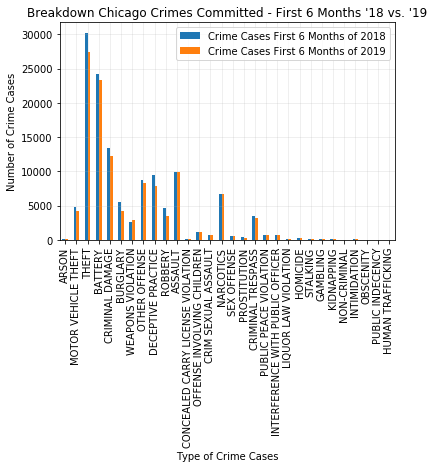

In [15]:
# Breakdown of crimes by type for first 6 months:

ax = abt6mo_df.plot.bar(rot=90)
# Incorporate the other graph properties
plt.title("Breakdown Chicago Crimes Committed - First 6 Months '18 vs. '19")
plt.ylabel("Number of Crime Cases")
plt.xlabel("Type of Crime Cases")
plt.grid(alpha = 0.25)
plt.xticks(rotation=90)

# Save the figure
plt.savefig("Resources/Breakdown of Chicago Crimes Committed in First Six Months 2018 vs 2019.png")

# Show plot
plt.show()

In [16]:
abm6mo18 = df_6mo_2018['Month'].value_counts(sort=False)
abm6mo19 = df_6mo_2019['Month'].value_counts(sort=False)
abm6mo18_tuples = [tuple((x, y)) for x, y in abm6mo18.items()]
abm6mo19_tuples = [tuple((x, y)) for x, y in abm6mo19.items()]
abm6mo18_tuples

[(1, 20358), (2, 17274), (3, 21163), (4, 21073), (5, 24640), (6, 24127)]

In [17]:
# Summing Crime By Month For Each Year, Merging into one dataframe:
monthly_sum_6mo_2018_crime_df = pd.DataFrame(abm6mo18_tuples)
monthly_sum_6mo_2019_crime_df = pd.DataFrame(abm6mo19_tuples)

monthly_sum_6mo_2018_crime_df = monthly_sum_6mo_2018_crime_df.rename(columns={0: "First 6 Months of:", 1: "2018"})
monthly_sum_6mo_2019_crime_df = monthly_sum_6mo_2019_crime_df.rename(columns={0: "First 6 Months of:", 1: "2019"})
monthly_sum_6mo_2018_crime_df["First 6 Months of:"] = ["Jan","Feb","March","April","May","June"]
monthly_sum_6mo_2019_crime_df["First 6 Months of:"] = ["Jan","Feb","March","April","May","June"]

monthly_sum_6mo_df = pd.merge(monthly_sum_6mo_2018_crime_df, monthly_sum_6mo_2019_crime_df, how='outer', on = "First 6 Months of:")
monthly_sum_6mo_df = monthly_sum_6mo_df.set_index('First 6 Months of:')
monthly_sum_6mo_df

,2018,2019
First 6 Months of:,,
Jan,20358,19258
Feb,17274,18076
March,21163,20090
April,21073,20581
May,24640,23156
June,24127,17866


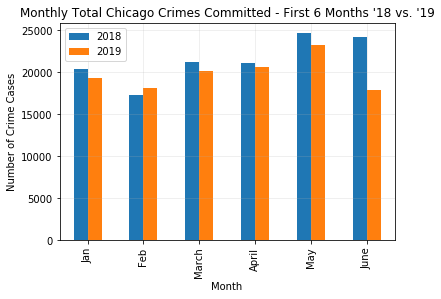

In [18]:
# Graphing monthly sums for first 6 months 2018 & 2019:
ay = monthly_sum_6mo_df.plot.bar(rot=90)
# Incorporate the other graph properties
plt.title("Monthly Total Chicago Crimes Committed - First 6 Months '18 vs. '19")
plt.ylabel("Number of Crime Cases")
plt.xlabel("Month")
plt.grid(alpha = 0.25)
plt.xticks(rotation=90)

# Save the figure
plt.savefig("Resources/Monthly Total Chicago Crimes Committed - First 6 Months '18 vs '19.png")

# Show plot
plt.show()

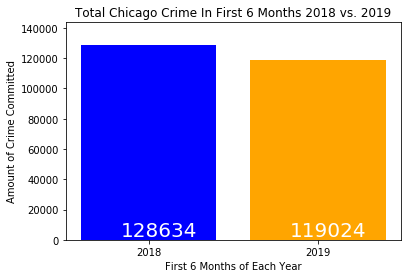

In [19]:
#Bar Chart of 6 Months Crime Totals 2018 vs. 2019:
sixmo_crimes = [sixmo_total_2018, sixmo_total_2019]
x_axis = np.arange(len(sixmo_crimes))
plt.bar(x_axis, sixmo_crimes, color=['b','orange'], align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["2018", "2019"])
# Sets the y limits of the current chart
plt.ylim(0, max(sixmo_crimes)+15000)

plt.text(x = -1/6 , y = 2500, s = str(sixmo_total_2018), size = 20, color="white")
plt.text(x = 1-1/6 , y = 2500, s = str(sixmo_total_2019), size = 20, color="white")

# Give our chart some labels and a tile
plt.title("Total Chicago Crime In First 6 Months 2018 vs. 2019")
plt.xlabel("First 6 Months of Each Year")
plt.ylabel("Amount of Crime Committed")
# Save the figure
plt.savefig("Resources/6 Months of Total Chicago Crime 2018 vs 2019.png")

# Show plot
plt.show()

TOTAL MONTHLY ARSON CRIMES:

In [20]:
#Monthly Arson Crimes:
arson_6mo_18 = arson_6mo_2018_df['Month'].value_counts(sort=False)
arson_6mo_19 = arson_6mo_2019_df['Month'].value_counts(sort=False)
arson_18_tuples = [tuple((x, y)) for x, y in arson_6mo_18.items()]
arson_19_tuples = [tuple((x, y)) for x, y in arson_6mo_19.items()]

# Summing Crime By Month For Each Year, Merging into one dataframe:
monthly_sum_6mo_18_arson_df = pd.DataFrame(arson_18_tuples)
monthly_sum_6mo_19_arson_df = pd.DataFrame(arson_19_tuples)


monthly_sum_6mo_18_arson_df = monthly_sum_6mo_18_arson_df.rename(columns={0: "First 6 Months of:", 1: "2018"})
monthly_sum_6mo_19_arson_df = monthly_sum_6mo_19_arson_df.rename(columns={0: "First 6 Months of:", 1: "2019"})
monthly_sum_6mo_18_arson_df["First 6 Months of:"] = ["Jan","Feb","March","April","May","June"]
monthly_sum_6mo_19_arson_df["First 6 Months of:"] = ["Jan","Feb","March","April","May","June"]

monthly_sum_arson_6mo_df = pd.merge(monthly_sum_6mo_18_arson_df, monthly_sum_6mo_19_arson_df, how='outer', on = "First 6 Months of:")
monthly_sum_arson_6mo_df = monthly_sum_arson_6mo_df.set_index('First 6 Months of:')
monthly_sum_arson_6mo_df

,2018,2019
First 6 Months of:,,
Jan,26,22
Feb,14,29
March,32,27
April,27,32
May,33,25
June,36,20


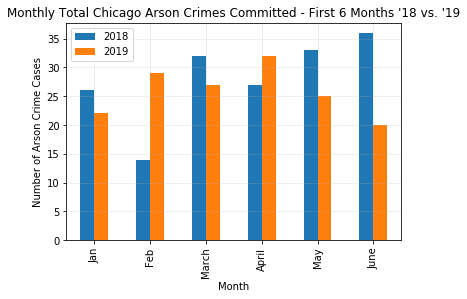

In [21]:
# USED AS AN EXAMPLE OF OTHER PLOTS THAT CAN BE GENERATED!
# Graphing monthly sums for Arson in first 6 months 2018 & 2019:
ay = monthly_sum_arson_6mo_df.plot.bar(rot=90)
# Incorporate the other graph properties
plt.title("Monthly Total Chicago Arson Crimes Committed - First 6 Months '18 vs. '19")
plt.ylabel("Number of Arson Crime Cases")
plt.xlabel("Month")
plt.grid(alpha = 0.25)
plt.xticks(rotation=90)

# Save the figure
plt.savefig("Resources/Monthly Total Chicago Arson Crimes Committed - First 6 Months '18 vs '19.png")

# Show plot
plt.show()

TOTAL MONTHLY THEFT CRIMES:

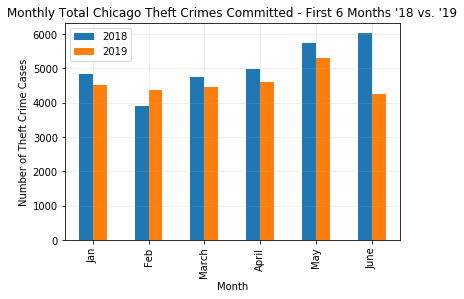

In [22]:
#Monthly Theft Crimes:
theft_6mo_18 = theft_6mo_2018_df['Month'].value_counts(sort=False)
theft_6mo_19 = theft_6mo_2019_df['Month'].value_counts(sort=False)
theft_18_tuples = [tuple((x, y)) for x, y in theft_6mo_18.items()]
theft_19_tuples = [tuple((x, y)) for x, y in theft_6mo_19.items()]

# Summing Crime By Month For Each Year, Merging into one dataframe:
monthly_sum_6mo_18_theft_df = pd.DataFrame(theft_18_tuples)
monthly_sum_6mo_19_theft_df = pd.DataFrame(theft_19_tuples)


monthly_sum_6mo_18_theft_df = monthly_sum_6mo_18_theft_df.rename(columns={0: "First 6 Months of:", 1: "2018"})
monthly_sum_6mo_19_theft_df = monthly_sum_6mo_19_theft_df.rename(columns={0: "First 6 Months of:", 1: "2019"})
monthly_sum_6mo_18_theft_df["First 6 Months of:"] = ["Jan","Feb","March","April","May","June"]
monthly_sum_6mo_19_theft_df["First 6 Months of:"] = ["Jan","Feb","March","April","May","June"]

monthly_sum_theft_6mo_df = pd.merge(monthly_sum_6mo_18_theft_df, monthly_sum_6mo_19_theft_df, how='outer', on = "First 6 Months of:")
monthly_sum_theft_6mo_df = monthly_sum_theft_6mo_df.set_index('First 6 Months of:')
monthly_sum_theft_6mo_df

# USED AS AN EXAMPLE OF OTHER PLOTS THAT CAN BE GENERATED!
# Graphing monthly sums for Theft in first 6 months 2018 & 2019:
ay = monthly_sum_theft_6mo_df.plot.bar(rot=90)
# Incorporate the other graph properties
plt.title("Monthly Total Chicago Theft Crimes Committed - First 6 Months '18 vs. '19")
plt.ylabel("Number of Theft Crime Cases")
plt.xlabel("Month")
plt.grid(alpha = 0.25)
plt.xticks(rotation=90)

# Save the figure
plt.savefig("Resources/Monthly Total Chicago Theft Crimes Committed - First 6 Months '18 vs '19.png")

# Show plot
plt.show()


TOTAL MONTHLY BATTERY CRIMES:

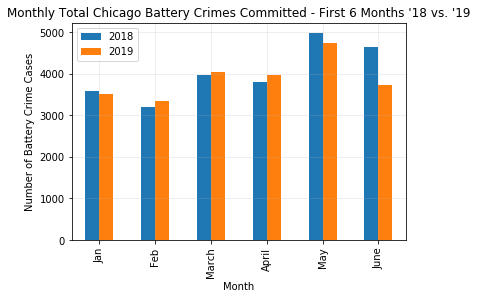

In [23]:
#Monthly Battery Crimes:
battery_6mo_18 = battery_6mo_2018_df['Month'].value_counts(sort=False)
battery_6mo_19 = battery_6mo_2019_df['Month'].value_counts(sort=False)
battery_18_tuples = [tuple((x, y)) for x, y in battery_6mo_18.items()]
battery_19_tuples = [tuple((x, y)) for x, y in battery_6mo_19.items()]

# Summing Crime By Month For Each Year, Merging into one dataframe:
monthly_sum_6mo_18_battery_df = pd.DataFrame(battery_18_tuples)
monthly_sum_6mo_19_battery_df = pd.DataFrame(battery_19_tuples)


monthly_sum_6mo_18_battery_df = monthly_sum_6mo_18_battery_df.rename(columns={0: "First 6 Months of:", 1: "2018"})
monthly_sum_6mo_19_battery_df = monthly_sum_6mo_19_battery_df.rename(columns={0: "First 6 Months of:", 1: "2019"})
monthly_sum_6mo_18_battery_df["First 6 Months of:"] = ["Jan","Feb","March","April","May","June"]
monthly_sum_6mo_19_battery_df["First 6 Months of:"] = ["Jan","Feb","March","April","May","June"]

monthly_sum_battery_6mo_df = pd.merge(monthly_sum_6mo_18_battery_df, monthly_sum_6mo_19_battery_df, how='outer', on = "First 6 Months of:")
monthly_sum_battery_6mo_df = monthly_sum_battery_6mo_df.set_index('First 6 Months of:')
monthly_sum_battery_6mo_df

# USED AS AN EXAMPLE OF OTHER PLOTS THAT CAN BE GENERATED!
# Graphing monthly sums for Battery in first 6 months 2018 & 2019:
ay = monthly_sum_battery_6mo_df.plot.bar(rot=90)
# Incorporate the other graph properties
plt.title("Monthly Total Chicago Battery Crimes Committed - First 6 Months '18 vs. '19")
plt.ylabel("Number of Battery Crime Cases")
plt.xlabel("Month")
plt.grid(alpha = 0.25)
plt.xticks(rotation=90)

# Save the figure
plt.savefig("Resources/Monthly Total Chicago Battery Crimes Committed - First 6 Months '18 vs '19.png")

# Show plot
plt.show()


TOTAL MONTHLY CRIMINAL DAMAGE CRIMES:

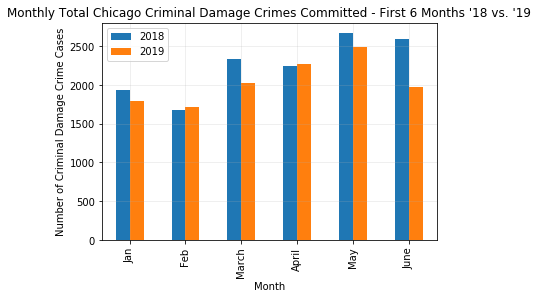

In [24]:
#Monthly Criminal_damage Crimes:
criminal_damage_6mo_18 = criminal_damage_6mo_2018_df['Month'].value_counts(sort=False)
criminal_damage_6mo_19 = criminal_damage_6mo_2019_df['Month'].value_counts(sort=False)
criminal_damage_18_tuples = [tuple((x, y)) for x, y in criminal_damage_6mo_18.items()]
criminal_damage_19_tuples = [tuple((x, y)) for x, y in criminal_damage_6mo_19.items()]

# Summing Crime By Month For Each Year, Merging into one dataframe:
monthly_sum_6mo_18_criminal_damage_df = pd.DataFrame(criminal_damage_18_tuples)
monthly_sum_6mo_19_criminal_damage_df = pd.DataFrame(criminal_damage_19_tuples)


monthly_sum_6mo_18_criminal_damage_df = monthly_sum_6mo_18_criminal_damage_df.rename(columns={0: "First 6 Months of:", 1: "2018"})
monthly_sum_6mo_19_criminal_damage_df = monthly_sum_6mo_19_criminal_damage_df.rename(columns={0: "First 6 Months of:", 1: "2019"})
monthly_sum_6mo_18_criminal_damage_df["First 6 Months of:"] = ["Jan","Feb","March","April","May","June"]
monthly_sum_6mo_19_criminal_damage_df["First 6 Months of:"] = ["Jan","Feb","March","April","May","June"]

monthly_sum_criminal_damage_6mo_df = pd.merge(monthly_sum_6mo_18_criminal_damage_df, monthly_sum_6mo_19_criminal_damage_df, how='outer', on = "First 6 Months of:")
monthly_sum_criminal_damage_6mo_df = monthly_sum_criminal_damage_6mo_df.set_index('First 6 Months of:')
monthly_sum_criminal_damage_6mo_df

# USED AS AN EXAMPLE OF OTHER PLOTS THAT CAN BE GENERATED!
# Graphing monthly sums for Criminal_damage in first 6 months 2018 & 2019:
ay = monthly_sum_criminal_damage_6mo_df.plot.bar(rot=90)
# Incorporate the other graph properties
plt.title("Monthly Total Chicago Criminal Damage Crimes Committed - First 6 Months '18 vs. '19")
plt.ylabel("Number of Criminal Damage Crime Cases")
plt.xlabel("Month")
plt.grid(alpha = 0.25)
plt.xticks(rotation=90)

# Save the figure
plt.savefig("Resources/Monthly Total Chicago Criminal Damage Crimes Committed - First 6 Months '18 vs '19.png")

# Show plot
plt.show()


In [25]:
# Counting the total number of arrests first 6 months 2018 and 2019:
arrest_count_18 = df_6mo_2018['Arrest'].value_counts()
arrest_18_tuples = [tuple((x, y)) for x, y in arrest_count_18.items()]
arrests_18_df = pd.DataFrame(arrest_18_tuples)
arrests_18_df['2']=['N','Y']
arrests_18_df = arrests_18_df.rename(columns={0: "R"})
arrests_18_df = arrests_18_df.drop(columns="R")

arr_18_df = arrests_18_df.set_index(["2"])
arr_18_df = arr_18_df.transpose()
count_arrest_6mo_18 = round(arr_18_df["Y"].mean())

arrest_6mo_19_df = df_6mo_2019.loc[df_6mo_2019["Arrest"] == "Y"]
count_arrest_6mo_19 = len(arrest_6mo_19_df)
print(count_arrest_6mo_18, count_arrest_6mo_19)

26407 25264


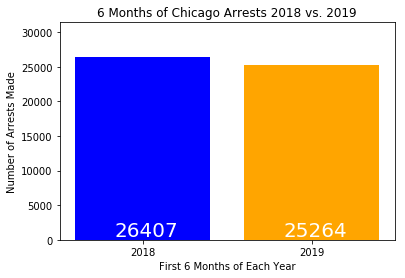

In [26]:
# Bar Chart of 6 Month Arrest Totals 2018 vs. 2019:
sixmo_arrests = [count_arrest_6mo_18, count_arrest_6mo_19]
x_axis = np.arange(len(sixmo_arrests))
plt.bar(x_axis, sixmo_arrests, color=['b','orange'], align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["2018", "2019"])
# Sets the y limits of the current chart
plt.ylim(0, max(sixmo_arrests)+5000)

plt.text(x = -1/6 , y = 500, s = str(count_arrest_6mo_18), size = 20, color="white")
plt.text(x = 1-1/6 , y = 500, s = str(count_arrest_6mo_19), size = 20, color="white")

# Give our chart some labels and a tile
plt.title("6 Months of Chicago Arrests 2018 vs. 2019")
plt.xlabel("First 6 Months of Each Year")
plt.ylabel("Number of Arrests Made")

# Save the figure
plt.savefig("Resources/6 Months of Chicago Arrests 2018 vs 2019.png")

# Show plot
plt.show()

In [27]:
jan_2018_df = df_6mo_2018.loc[df_6mo_2018["Month"] == 1]
feb_2018_df = df_6mo_2018.loc[df_6mo_2018["Month"] == 2]
mar_2018_df = df_6mo_2018.loc[df_6mo_2018["Month"] == 3]
apr_2018_df = df_6mo_2018.loc[df_6mo_2018["Month"] == 4]
may_2018_df = df_6mo_2018.loc[df_6mo_2018["Month"] == 5]
jun_2018_df = df_6mo_2018.loc[df_6mo_2018["Month"] == 6]

jan_2019_df = df_6mo_2019.loc[df_6mo_2019["Month"] == 1]
feb_2019_df = df_6mo_2019.loc[df_6mo_2019["Month"] == 2]
mar_2019_df = df_6mo_2019.loc[df_6mo_2019["Month"] == 3]
apr_2019_df = df_6mo_2019.loc[df_6mo_2019["Month"] == 4]
may_2019_df = df_6mo_2019.loc[df_6mo_2019["Month"] == 5]
jun_2019_df = df_6mo_2019.loc[df_6mo_2019["Month"] == 6]


In [28]:
# Counting the number of arrests for January 2018 and 2019:
jan_arrest_count_18 = jan_2018_df['Arrest'].value_counts()
jan_arrest_18_tuples = [tuple((x, y)) for x, y in jan_arrest_count_18.items()]
jan_arrests_18_df = pd.DataFrame(jan_arrest_18_tuples)
jan_arrests_18_df['2']=['N','Y']
jan_arrests_18_df = jan_arrests_18_df.rename(columns={0: "R"})
jan_arrests_18_df = jan_arrests_18_df.drop(columns="R")

jan_arr_18_df = jan_arrests_18_df.set_index(["2"])
jan_arr_18_df = jan_arr_18_df.transpose()
count_jan_arrest_6mo_18 = round(jan_arr_18_df["Y"].mean())

jan_arrest_6mo_19_df = jan_2019_df.loc[jan_2019_df["Arrest"] == "Y"]
count_jan_arrest_6mo_19 = len(jan_arrest_6mo_19_df)
print(count_jan_arrest_6mo_18, count_jan_arrest_6mo_19)

4193 4296


In [29]:
# Counting the number of arrests for February 2018 and 2019:
feb_arrest_count_18 = feb_2018_df['Arrest'].value_counts()
feb_arrest_18_tuples = [tuple((x, y)) for x, y in feb_arrest_count_18.items()]
feb_arrests_18_df = pd.DataFrame(feb_arrest_18_tuples)
feb_arrests_18_df['2']=['N','Y']
feb_arrests_18_df = feb_arrests_18_df.rename(columns={0: "R"})
feb_arrests_18_df = feb_arrests_18_df.drop(columns="R")

feb_arr_18_df = feb_arrests_18_df.set_index(["2"])
feb_arr_18_df = feb_arr_18_df.transpose()
count_feb_arrest_6mo_18 = round(feb_arr_18_df["Y"].mean())

feb_arrest_6mo_19_df = feb_2019_df.loc[feb_2019_df["Arrest"] == "Y"]
count_feb_arrest_6mo_19 = len(feb_arrest_6mo_19_df)
print(count_feb_arrest_6mo_18, count_feb_arrest_6mo_19)

3868 3977


In [30]:
# Counting the number of arrests for March 2018 and 2019:
mar_arrest_count_18 = mar_2018_df['Arrest'].value_counts()
mar_arrest_18_tuples = [tuple((x, y)) for x, y in mar_arrest_count_18.items()]
mar_arrests_18_df = pd.DataFrame(mar_arrest_18_tuples)
mar_arrests_18_df['2']=['N','Y']
mar_arrests_18_df = mar_arrests_18_df.rename(columns={0: "R"})
mar_arrests_18_df = mar_arrests_18_df.drop(columns="R")

mar_arr_18_df = mar_arrests_18_df.set_index(["2"])
mar_arr_18_df = mar_arr_18_df.transpose()
count_mar_arrest_6mo_18 = round(mar_arr_18_df["Y"].mean())

mar_arrest_6mo_19_df = mar_2019_df.loc[mar_2019_df["Arrest"] == "Y"]
count_mar_arrest_6mo_19 = len(mar_arrest_6mo_19_df)
print(count_mar_arrest_6mo_18, count_mar_arrest_6mo_19)

4585 4563


In [31]:
# Counting the number of arrests for April 2018 and 2019:
apr_arrest_count_18 = apr_2018_df['Arrest'].value_counts()
apr_arrest_18_tuples = [tuple((x, y)) for x, y in apr_arrest_count_18.items()]
apr_arrests_18_df = pd.DataFrame(apr_arrest_18_tuples)
apr_arrests_18_df['2']=['N','Y']
apr_arrests_18_df = apr_arrests_18_df.rename(columns={0: "R"})
apr_arrests_18_df = apr_arrests_18_df.drop(columns="R")

apr_arr_18_df = apr_arrests_18_df.set_index(["2"])
apr_arr_18_df = apr_arr_18_df.transpose()
count_apr_arrest_6mo_18 = round(apr_arr_18_df["Y"].mean())

apr_arrest_6mo_19_df = apr_2019_df.loc[apr_2019_df["Arrest"] == "Y"]
count_apr_arrest_6mo_19 = len(apr_arrest_6mo_19_df)
print(count_apr_arrest_6mo_18, count_apr_arrest_6mo_19)

4250 4317


In [32]:
# Counting the number of arrests for May 2018 and 2019:
may_arrest_count_18 = may_2018_df['Arrest'].value_counts()
may_arrest_18_tuples = [tuple((x, y)) for x, y in may_arrest_count_18.items()]
may_arrests_18_df = pd.DataFrame(may_arrest_18_tuples)
may_arrests_18_df['2']=['N','Y']
may_arrests_18_df = may_arrests_18_df.rename(columns={0: "R"})
may_arrests_18_df = may_arrests_18_df.drop(columns="R")

may_arr_18_df = may_arrests_18_df.set_index(["2"])
may_arr_18_df = may_arr_18_df.transpose()
count_may_arrest_6mo_18 = round(may_arr_18_df["Y"].mean())

may_arrest_6mo_19_df = may_2019_df.loc[may_2019_df["Arrest"] == "Y"]
count_may_arrest_6mo_19 = len(may_arrest_6mo_19_df)
print(count_may_arrest_6mo_18, count_may_arrest_6mo_19)

4949 4776


In [33]:
# Counting the number of arrests for June 2018 and 2019:
jun_arrest_count_18 = jun_2018_df['Arrest'].value_counts()
jun_arrest_18_tuples = [tuple((x, y)) for x, y in jun_arrest_count_18.items()]
jun_arrests_18_df = pd.DataFrame(jun_arrest_18_tuples)
jun_arrests_18_df['2']=['N','Y']
jun_arrests_18_df = jun_arrests_18_df.rename(columns={0: "R"})
jun_arrests_18_df = jun_arrests_18_df.drop(columns="R")

jun_arr_18_df = jun_arrests_18_df.set_index(["2"])
jun_arr_18_df = jun_arr_18_df.transpose()
count_jun_arrest_6mo_18 = round(jun_arr_18_df["Y"].mean())

jun_arrest_6mo_19_df = jun_2019_df.loc[jun_2019_df["Arrest"] == "Y"]
count_jun_arrest_6mo_19 = len(jun_arrest_6mo_19_df)
print(count_jun_arrest_6mo_18, count_jun_arrest_6mo_19)

4562 3335


In [34]:
arrests_6mo_2018_dict = {
    'January' : count_jan_arrest_6mo_18,
    'February' : count_feb_arrest_6mo_18,
    'March' : count_mar_arrest_6mo_18,
    'April' : count_apr_arrest_6mo_18,
    'May' : count_may_arrest_6mo_18,
    'June' : count_jun_arrest_6mo_18,
}

arrests_6mo_2019_dict = {
    'January' : count_jan_arrest_6mo_19,
    'February' : count_feb_arrest_6mo_19,
    'March' : count_mar_arrest_6mo_19,
    'April' : count_apr_arrest_6mo_19,
    'May' : count_may_arrest_6mo_19,
    'June' : count_jun_arrest_6mo_19,
}

In [35]:
arrests_by_month_6mo_2018_df = pd.DataFrame(arrests_6mo_2018_dict, index=[0])
arrests_by_month_6mo_2019_df = pd.DataFrame(arrests_6mo_2019_dict, index=[0])
abm6mo18_df = arrests_by_month_6mo_2018_df.transpose()
abm6mo_df = abm6mo18_df.rename(columns={0: "Arrests First 6 Months of 2018"})
abm6mo_df["Arrests First 6 Months of 2019"] = arrests_by_month_6mo_2019_df.transpose()
abm6mo_df

,Arrests First 6 Months of 2018,Arrests First 6 Months of 2019
January,4193,4296
February,3868,3977
March,4585,4563
April,4250,4317
May,4949,4776
June,4562,3335


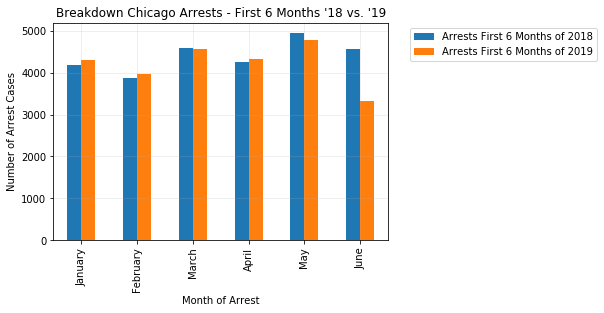

In [36]:
# Breakdown of arrests by month for first 6 months:

ax = abm6mo_df.plot.bar(rot=90)
# Incorporate the other graph properties
plt.title("Breakdown Chicago Arrests - First 6 Months '18 vs. '19")
plt.ylabel("Number of Arrest Cases")
plt.xlabel("Month of Arrest")
plt.grid(alpha = 0.25)
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1))

# Save the figure
plt.savefig("Resources/Breakdown of Chicago Arrests in First Six Months 2018 vs 2019.png")

# Show plot
plt.show()

ARSON ARREST ANALYSIS:

In [37]:
# Creating Monthly DataFrames for specific Crime for 2018 and 2019:
arson_jan_2018_df = jan_2018_df.loc[jan_2018_df["Primary Description"] == "ARSON"]
arson_jan_2018 = len(arson_jan_2018_df)
arson_jan_2019_df = jan_2019_df.loc[jan_2019_df["Primary Description"] == "ARSON"]
arson_jan_2019 = len(arson_jan_2019_df)

arson_feb_2018_df = feb_2018_df.loc[feb_2018_df["Primary Description"] == "ARSON"]
arson_feb_2018 = len(arson_feb_2018_df)
arson_feb_2019_df = feb_2019_df.loc[feb_2019_df["Primary Description"] == "ARSON"]
arson_feb_2019 = len(arson_feb_2019_df)

arson_mar_2018_df = mar_2018_df.loc[mar_2018_df["Primary Description"] == "ARSON"]
arson_mar_2018 = len(arson_mar_2018_df)
arson_mar_2019_df = mar_2019_df.loc[mar_2019_df["Primary Description"] == "ARSON"]
arson_mar_2019 = len(arson_mar_2019_df)

arson_apr_2018_df = apr_2018_df.loc[apr_2018_df["Primary Description"] == "ARSON"]
arson_apr_2018 = len(arson_apr_2018_df)
arson_apr_2019_df = apr_2019_df.loc[apr_2019_df["Primary Description"] == "ARSON"]
arson_apr_2019 = len(arson_apr_2019_df)

arson_may_2018_df = may_2018_df.loc[may_2018_df["Primary Description"] == "ARSON"]
arson_may_2018 = len(arson_may_2018_df)
arson_may_2019_df = may_2019_df.loc[may_2019_df["Primary Description"] == "ARSON"]
arson_may_2019 = len(arson_may_2019_df)

arson_jun_2018_df = jun_2018_df.loc[jun_2018_df["Primary Description"] == "ARSON"]
arson_jun_2018 = len(arson_jun_2018_df)
arson_jun_2019_df = jun_2019_df.loc[jun_2019_df["Primary Description"] == "ARSON"]
arson_jun_2019 = len(arson_jun_2019_df)

In [38]:
# Counting the number of arson arrests for January 2018 and 2019 as an example of what can be done graphically:
jan_arson_arrest_count_18 = arson_jan_2018_df['Arrest'].value_counts()
jan_arson_arrest_18_tuples = [tuple((x, y)) for x, y in jan_arson_arrest_count_18.items()]
jan_arson_arrests_18_df = pd.DataFrame(jan_arson_arrest_18_tuples)
jan_arson_arrests_18_df['2']=['N','Y']
jan_arson_arrests_18_df = jan_arson_arrests_18_df.rename(columns={0: "R"})
jan_arson_arrests_18_df = jan_arson_arrests_18_df.drop(columns="R")

jan_arson_arr_18_df = jan_arson_arrests_18_df.set_index(["2"])
jan_arson_arr_18_df = jan_arson_arr_18_df.transpose()
count_jan_arson_arrest_6mo_18 = round(jan_arson_arr_18_df["Y"].mean())

jan_arson_arrest_6mo_19_df = arson_jan_2019_df.loc[arson_jan_2019_df["Arrest"] == "Y"]
count_jan_arson_arrest_6mo_19 = len(jan_arson_arrest_6mo_19_df)
print(count_jan_arson_arrest_6mo_18, count_jan_arson_arrest_6mo_19)

# Counting the number of arson arrests for February 2018 and 2019:
feb_arson_arrest_count_18 = arson_feb_2018_df['Arrest'].value_counts()
feb_arson_arrest_18_tuples = [tuple((x, y)) for x, y in feb_arson_arrest_count_18.items()]
feb_arson_arrests_18_df = pd.DataFrame(feb_arson_arrest_18_tuples)
feb_arson_arrests_18_df['2']=['N','Y']
feb_arson_arrests_18_df = feb_arson_arrests_18_df.rename(columns={0: "R"})
feb_arson_arrests_18_df = feb_arson_arrests_18_df.drop(columns="R")

feb_arson_arr_18_df = feb_arson_arrests_18_df.set_index(["2"])
feb_arson_arr_18_df = feb_arson_arr_18_df.transpose()
count_feb_arson_arrest_6mo_18 = round(feb_arson_arr_18_df["Y"].mean())

feb_arson_arrest_6mo_19_df = arson_feb_2019_df.loc[arson_feb_2019_df["Arrest"] == "Y"]
count_feb_arson_arrest_6mo_19 = len(feb_arson_arrest_6mo_19_df)
print(count_feb_arson_arrest_6mo_18, count_feb_arson_arrest_6mo_19)

# Counting the number of arson arrests for March 2018 and 2019:
mar_arson_arrest_count_18 = arson_mar_2018_df['Arrest'].value_counts()
mar_arson_arrest_18_tuples = [tuple((x, y)) for x, y in mar_arson_arrest_count_18.items()]
mar_arson_arrests_18_df = pd.DataFrame(mar_arson_arrest_18_tuples)
mar_arson_arrests_18_df['2']=['N','Y']
mar_arson_arrests_18_df = mar_arson_arrests_18_df.rename(columns={0: "R"})
mar_arson_arrests_18_df = mar_arson_arrests_18_df.drop(columns="R")

mar_arson_arr_18_df = mar_arson_arrests_18_df.set_index(["2"])
mar_arson_arr_18_df = mar_arson_arr_18_df.transpose()
count_mar_arson_arrest_6mo_18 = round(mar_arson_arr_18_df["Y"].mean())

mar_arson_arrest_6mo_19_df = arson_mar_2019_df.loc[arson_mar_2019_df["Arrest"] == "Y"]
count_mar_arson_arrest_6mo_19 = len(mar_arson_arrest_6mo_19_df)
print(count_mar_arson_arrest_6mo_18, count_mar_arson_arrest_6mo_19)

# Counting the number of arson arrests for April 2018 and 2019:
apr_arson_arrest_count_18 = arson_apr_2018_df['Arrest'].value_counts()
apr_arson_arrest_18_tuples = [tuple((x, y)) for x, y in apr_arson_arrest_count_18.items()]
apr_arson_arrests_18_df = pd.DataFrame(apr_arson_arrest_18_tuples)
apr_arson_arrests_18_df['2']=['N','Y']
apr_arson_arrests_18_df = apr_arson_arrests_18_df.rename(columns={0: "R"})
apr_arson_arrests_18_df = apr_arson_arrests_18_df.drop(columns="R")

apr_arson_arr_18_df = apr_arson_arrests_18_df.set_index(["2"])
apr_arson_arr_18_df = apr_arson_arr_18_df.transpose()
count_apr_arson_arrest_6mo_18 = round(apr_arson_arr_18_df["Y"].mean())

apr_arson_arrest_6mo_19_df = arson_apr_2019_df.loc[arson_apr_2019_df["Arrest"] == "Y"]
count_apr_arson_arrest_6mo_19 = len(apr_arson_arrest_6mo_19_df)
print(count_apr_arson_arrest_6mo_18, count_apr_arson_arrest_6mo_19)

# Counting the number of arson arrests for May 2018 and 2019:
may_arson_arrest_count_18 = arson_may_2018_df['Arrest'].value_counts()
may_arson_arrest_18_tuples = [tuple((x, y)) for x, y in may_arson_arrest_count_18.items()]
may_arson_arrests_18_df = pd.DataFrame(may_arson_arrest_18_tuples)
may_arson_arrests_18_df['2']=['N','Y']
may_arson_arrests_18_df = may_arson_arrests_18_df.rename(columns={0: "R"})
may_arson_arrests_18_df = may_arson_arrests_18_df.drop(columns="R")

may_arson_arr_18_df = may_arson_arrests_18_df.set_index(["2"])
may_arson_arr_18_df = may_arson_arr_18_df.transpose()
count_may_arson_arrest_6mo_18 = round(may_arson_arr_18_df["Y"].mean())

may_arson_arrest_6mo_19_df = arson_may_2019_df.loc[arson_may_2019_df["Arrest"] == "Y"]
count_may_arson_arrest_6mo_19 = len(may_arson_arrest_6mo_19_df)
print(count_may_arson_arrest_6mo_18, count_may_arson_arrest_6mo_19)

# Counting the number of arson arrests for June 2018 and 2019:
jun_arson_arrest_count_18 = arson_jun_2018_df['Arrest'].value_counts()
jun_arson_arrest_18_tuples = [tuple((x, y)) for x, y in jun_arson_arrest_count_18.items()]
jun_arson_arrests_18_df = pd.DataFrame(jun_arson_arrest_18_tuples)
jun_arson_arrests_18_df['2']=['N','Y']
jun_arson_arrests_18_df = jun_arson_arrests_18_df.rename(columns={0: "R"})
jun_arson_arrests_18_df = jun_arson_arrests_18_df.drop(columns="R")

jun_arson_arr_18_df = jun_arson_arrests_18_df.set_index(["2"])
jun_arson_arr_18_df = jun_arson_arr_18_df.transpose()
count_jun_arson_arrest_6mo_18 = round(jun_arson_arr_18_df["Y"].mean())

jun_arson_arrest_6mo_19_df = arson_jun_2019_df.loc[arson_jun_2019_df["Arrest"] == "Y"]
count_jun_arson_arrest_6mo_19 = len(jun_arson_arrest_6mo_19_df)
print(count_jun_arson_arrest_6mo_18, count_jun_arson_arrest_6mo_19)


4 0
1 2
3 2
3 1
3 1
5 1


In [39]:
# Creating 6mo dicts for 2018 and 2019:
arson_arrests_6mo_2018_dict = {
    'January' : count_jan_arson_arrest_6mo_18,
    'February' : count_feb_arson_arrest_6mo_18,
    'March' : count_mar_arson_arrest_6mo_18,
    'April' : count_apr_arson_arrest_6mo_18,
    'May' : count_may_arson_arrest_6mo_18,
    'June' : count_jun_arson_arrest_6mo_18,
}

arson_arrests_6mo_2019_dict = {
    'January' : count_jan_arson_arrest_6mo_19,
    'February' : count_feb_arson_arrest_6mo_19,
    'March' : count_mar_arson_arrest_6mo_19,
    'April' : count_apr_arson_arrest_6mo_19,
    'May' : count_may_arson_arrest_6mo_19,
    'June' : count_jun_arson_arrest_6mo_19,
}

In [40]:
# Creating a single dataframe for graphing:
arson_arrests_by_month_6mo_2018_df = pd.DataFrame(arson_arrests_6mo_2018_dict, index=[0])
arson_arrests_by_month_6mo_2019_df = pd.DataFrame(arson_arrests_6mo_2019_dict, index=[0])
arson_abm6mo18_df = arson_arrests_by_month_6mo_2018_df.transpose()
arson_abm6mo_df = arson_abm6mo18_df.rename(columns={0: "Arson Arrests First 6 Months of 2018"})
arson_abm6mo_df["Arson Arrests First 6 Months of 2019"] = arson_arrests_by_month_6mo_2019_df.transpose()
arson_abm6mo_df

,Arson Arrests First 6 Months of 2018,Arson Arrests First 6 Months of 2019
January,4,0
February,1,2
March,3,2
April,3,1
May,3,1
June,5,1


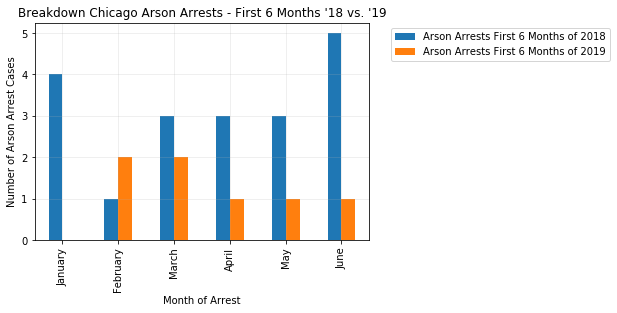

In [41]:
# AS AN EXAMPLE:
# Breakdown of arson arrests by month for first 6 months:

ax = arson_abm6mo_df.plot.bar(rot=90)
# Incorporate the other graph properties
plt.title("Breakdown Chicago Arson Arrests - First 6 Months '18 vs. '19")
plt.ylabel("Number of Arson Arrest Cases")
plt.xlabel("Month of Arrest")
plt.grid(alpha = 0.25)
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1))

# Save the figure
plt.savefig("Resources/Breakdown of Chicago Arson Arrests in First Six Months 2018 vs 2019.png")

# Show plot
plt.show()

THEFT ARREST ANALYSIS:

501 509
478 470
529 449
528 462
540 529
545 282


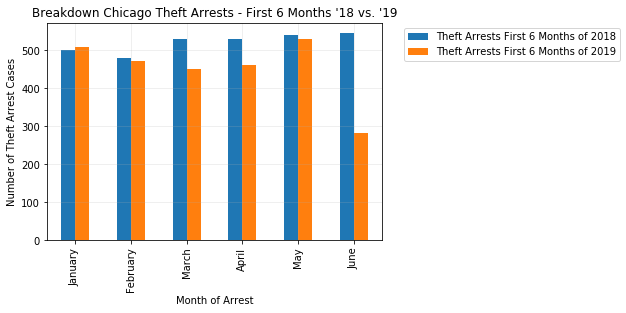

In [42]:
# Creating Monthly DataFrames for specific Crime for 2018 and 2019:
theft_jan_2018_df = jan_2018_df.loc[jan_2018_df["Primary Description"] == "THEFT"]
theft_jan_2018 = len(theft_jan_2018_df)
theft_jan_2019_df = jan_2019_df.loc[jan_2019_df["Primary Description"] == "THEFT"]
theft_jan_2019 = len(theft_jan_2019_df)

theft_feb_2018_df = feb_2018_df.loc[feb_2018_df["Primary Description"] == "THEFT"]
theft_feb_2018 = len(theft_feb_2018_df)
theft_feb_2019_df = feb_2019_df.loc[feb_2019_df["Primary Description"] == "THEFT"]
theft_feb_2019 = len(theft_feb_2019_df)

theft_mar_2018_df = mar_2018_df.loc[mar_2018_df["Primary Description"] == "THEFT"]
theft_mar_2018 = len(theft_mar_2018_df)
theft_mar_2019_df = mar_2019_df.loc[mar_2019_df["Primary Description"] == "THEFT"]
theft_mar_2019 = len(theft_mar_2019_df)

theft_apr_2018_df = apr_2018_df.loc[apr_2018_df["Primary Description"] == "THEFT"]
theft_apr_2018 = len(theft_apr_2018_df)
theft_apr_2019_df = apr_2019_df.loc[apr_2019_df["Primary Description"] == "THEFT"]
theft_apr_2019 = len(theft_apr_2019_df)

theft_may_2018_df = may_2018_df.loc[may_2018_df["Primary Description"] == "THEFT"]
theft_may_2018 = len(theft_may_2018_df)
theft_may_2019_df = may_2019_df.loc[may_2019_df["Primary Description"] == "THEFT"]
theft_may_2019 = len(theft_may_2019_df)

theft_jun_2018_df = jun_2018_df.loc[jun_2018_df["Primary Description"] == "THEFT"]
theft_jun_2018 = len(theft_jun_2018_df)
theft_jun_2019_df = jun_2019_df.loc[jun_2019_df["Primary Description"] == "THEFT"]
theft_jun_2019 = len(theft_jun_2019_df)


# Counting the number of theft arrests for January 2018 and 2019 as an example of what can be done graphically:
jan_theft_arrest_count_18 = theft_jan_2018_df['Arrest'].value_counts()
jan_theft_arrest_18_tuples = [tuple((x, y)) for x, y in jan_theft_arrest_count_18.items()]
jan_theft_arrests_18_df = pd.DataFrame(jan_theft_arrest_18_tuples)
jan_theft_arrests_18_df['2']=['N','Y']
jan_theft_arrests_18_df = jan_theft_arrests_18_df.rename(columns={0: "R"})
jan_theft_arrests_18_df = jan_theft_arrests_18_df.drop(columns="R")

jan_theft_arr_18_df = jan_theft_arrests_18_df.set_index(["2"])
jan_theft_arr_18_df = jan_theft_arr_18_df.transpose()
count_jan_theft_arrest_6mo_18 = round(jan_theft_arr_18_df["Y"].mean())

jan_theft_arrest_6mo_19_df = theft_jan_2019_df.loc[theft_jan_2019_df["Arrest"] == "Y"]
count_jan_theft_arrest_6mo_19 = len(jan_theft_arrest_6mo_19_df)
print(count_jan_theft_arrest_6mo_18, count_jan_theft_arrest_6mo_19)

# Counting the number of theft arrests for February 2018 and 2019:
feb_theft_arrest_count_18 = theft_feb_2018_df['Arrest'].value_counts()
feb_theft_arrest_18_tuples = [tuple((x, y)) for x, y in feb_theft_arrest_count_18.items()]
feb_theft_arrests_18_df = pd.DataFrame(feb_theft_arrest_18_tuples)
feb_theft_arrests_18_df['2']=['N','Y']
feb_theft_arrests_18_df = feb_theft_arrests_18_df.rename(columns={0: "R"})
feb_theft_arrests_18_df = feb_theft_arrests_18_df.drop(columns="R")

feb_theft_arr_18_df = feb_theft_arrests_18_df.set_index(["2"])
feb_theft_arr_18_df = feb_theft_arr_18_df.transpose()
count_feb_theft_arrest_6mo_18 = round(feb_theft_arr_18_df["Y"].mean())

feb_theft_arrest_6mo_19_df = theft_feb_2019_df.loc[theft_feb_2019_df["Arrest"] == "Y"]
count_feb_theft_arrest_6mo_19 = len(feb_theft_arrest_6mo_19_df)
print(count_feb_theft_arrest_6mo_18, count_feb_theft_arrest_6mo_19)

# Counting the number of theft arrests for March 2018 and 2019:
mar_theft_arrest_count_18 = theft_mar_2018_df['Arrest'].value_counts()
mar_theft_arrest_18_tuples = [tuple((x, y)) for x, y in mar_theft_arrest_count_18.items()]
mar_theft_arrests_18_df = pd.DataFrame(mar_theft_arrest_18_tuples)
mar_theft_arrests_18_df['2']=['N','Y']
mar_theft_arrests_18_df = mar_theft_arrests_18_df.rename(columns={0: "R"})
mar_theft_arrests_18_df = mar_theft_arrests_18_df.drop(columns="R")

mar_theft_arr_18_df = mar_theft_arrests_18_df.set_index(["2"])
mar_theft_arr_18_df = mar_theft_arr_18_df.transpose()
count_mar_theft_arrest_6mo_18 = round(mar_theft_arr_18_df["Y"].mean())

mar_theft_arrest_6mo_19_df = theft_mar_2019_df.loc[theft_mar_2019_df["Arrest"] == "Y"]
count_mar_theft_arrest_6mo_19 = len(mar_theft_arrest_6mo_19_df)
print(count_mar_theft_arrest_6mo_18, count_mar_theft_arrest_6mo_19)

# Counting the number of theft arrests for April 2018 and 2019:
apr_theft_arrest_count_18 = theft_apr_2018_df['Arrest'].value_counts()
apr_theft_arrest_18_tuples = [tuple((x, y)) for x, y in apr_theft_arrest_count_18.items()]
apr_theft_arrests_18_df = pd.DataFrame(apr_theft_arrest_18_tuples)
apr_theft_arrests_18_df['2']=['N','Y']
apr_theft_arrests_18_df = apr_theft_arrests_18_df.rename(columns={0: "R"})
apr_theft_arrests_18_df = apr_theft_arrests_18_df.drop(columns="R")

apr_theft_arr_18_df = apr_theft_arrests_18_df.set_index(["2"])
apr_theft_arr_18_df = apr_theft_arr_18_df.transpose()
count_apr_theft_arrest_6mo_18 = round(apr_theft_arr_18_df["Y"].mean())

apr_theft_arrest_6mo_19_df = theft_apr_2019_df.loc[theft_apr_2019_df["Arrest"] == "Y"]
count_apr_theft_arrest_6mo_19 = len(apr_theft_arrest_6mo_19_df)
print(count_apr_theft_arrest_6mo_18, count_apr_theft_arrest_6mo_19)

# Counting the number of theft arrests for May 2018 and 2019:
may_theft_arrest_count_18 = theft_may_2018_df['Arrest'].value_counts()
may_theft_arrest_18_tuples = [tuple((x, y)) for x, y in may_theft_arrest_count_18.items()]
may_theft_arrests_18_df = pd.DataFrame(may_theft_arrest_18_tuples)
may_theft_arrests_18_df['2']=['N','Y']
may_theft_arrests_18_df = may_theft_arrests_18_df.rename(columns={0: "R"})
may_theft_arrests_18_df = may_theft_arrests_18_df.drop(columns="R")

may_theft_arr_18_df = may_theft_arrests_18_df.set_index(["2"])
may_theft_arr_18_df = may_theft_arr_18_df.transpose()
count_may_theft_arrest_6mo_18 = round(may_theft_arr_18_df["Y"].mean())

may_theft_arrest_6mo_19_df = theft_may_2019_df.loc[theft_may_2019_df["Arrest"] == "Y"]
count_may_theft_arrest_6mo_19 = len(may_theft_arrest_6mo_19_df)
print(count_may_theft_arrest_6mo_18, count_may_theft_arrest_6mo_19)

# Counting the number of theft arrests for June 2018 and 2019:
jun_theft_arrest_count_18 = theft_jun_2018_df['Arrest'].value_counts()
jun_theft_arrest_18_tuples = [tuple((x, y)) for x, y in jun_theft_arrest_count_18.items()]
jun_theft_arrests_18_df = pd.DataFrame(jun_theft_arrest_18_tuples)
jun_theft_arrests_18_df['2']=['N','Y']
jun_theft_arrests_18_df = jun_theft_arrests_18_df.rename(columns={0: "R"})
jun_theft_arrests_18_df = jun_theft_arrests_18_df.drop(columns="R")

jun_theft_arr_18_df = jun_theft_arrests_18_df.set_index(["2"])
jun_theft_arr_18_df = jun_theft_arr_18_df.transpose()
count_jun_theft_arrest_6mo_18 = round(jun_theft_arr_18_df["Y"].mean())

jun_theft_arrest_6mo_19_df = theft_jun_2019_df.loc[theft_jun_2019_df["Arrest"] == "Y"]
count_jun_theft_arrest_6mo_19 = len(jun_theft_arrest_6mo_19_df)
print(count_jun_theft_arrest_6mo_18, count_jun_theft_arrest_6mo_19)


# Creating 6mo dicts for 2018 and 2019:
theft_arrests_6mo_2018_dict = {
    'January' : count_jan_theft_arrest_6mo_18,
    'February' : count_feb_theft_arrest_6mo_18,
    'March' : count_mar_theft_arrest_6mo_18,
    'April' : count_apr_theft_arrest_6mo_18,
    'May' : count_may_theft_arrest_6mo_18,
    'June' : count_jun_theft_arrest_6mo_18,
}

theft_arrests_6mo_2019_dict = {
    'January' : count_jan_theft_arrest_6mo_19,
    'February' : count_feb_theft_arrest_6mo_19,
    'March' : count_mar_theft_arrest_6mo_19,
    'April' : count_apr_theft_arrest_6mo_19,
    'May' : count_may_theft_arrest_6mo_19,
    'June' : count_jun_theft_arrest_6mo_19,
}

# Creating a single dataframe for graphing:
theft_arrests_by_month_6mo_2018_df = pd.DataFrame(theft_arrests_6mo_2018_dict, index=[0])
theft_arrests_by_month_6mo_2019_df = pd.DataFrame(theft_arrests_6mo_2019_dict, index=[0])
theft_abm6mo18_df = theft_arrests_by_month_6mo_2018_df.transpose()
theft_abm6mo_df = theft_abm6mo18_df.rename(columns={0: "Theft Arrests First 6 Months of 2018"})
theft_abm6mo_df["Theft Arrests First 6 Months of 2019"] = theft_arrests_by_month_6mo_2019_df.transpose()
theft_abm6mo_df

# AS AN EXAMPLE:
# Breakdown of theft arrests by month for first 6 months:

ax = theft_abm6mo_df.plot.bar(rot=90)
# Incorporate the other graph properties
plt.title("Breakdown Chicago Theft Arrests - First 6 Months '18 vs. '19")
plt.ylabel("Number of Theft Arrest Cases")
plt.xlabel("Month of Arrest")
plt.grid(alpha = 0.25)
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1))

# Save the figure
plt.savefig("Resources/Breakdown of Chicago Theft Arrests in First Six Months 2018 vs 2019.png")

# Show plot
plt.show()


BATTERY ARREST ANALYSIS:

771 771
766 709
840 886
748 822
1036 937
896 670


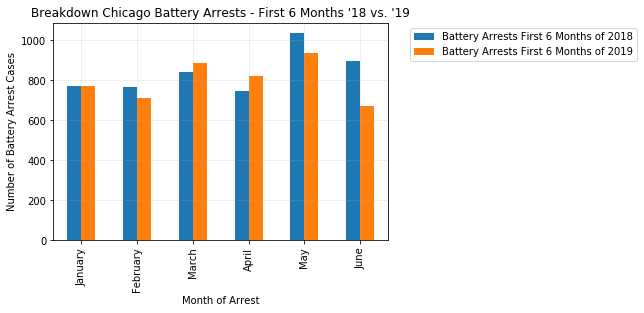

In [43]:
# Creating Monthly DataFrames for specific Crime for 2018 and 2019:
battery_jan_2018_df = jan_2018_df.loc[jan_2018_df["Primary Description"] == "BATTERY"]
battery_jan_2018 = len(battery_jan_2018_df)
battery_jan_2019_df = jan_2019_df.loc[jan_2019_df["Primary Description"] == "BATTERY"]
battery_jan_2019 = len(battery_jan_2019_df)

battery_feb_2018_df = feb_2018_df.loc[feb_2018_df["Primary Description"] == "BATTERY"]
battery_feb_2018 = len(battery_feb_2018_df)
battery_feb_2019_df = feb_2019_df.loc[feb_2019_df["Primary Description"] == "BATTERY"]
battery_feb_2019 = len(battery_feb_2019_df)

battery_mar_2018_df = mar_2018_df.loc[mar_2018_df["Primary Description"] == "BATTERY"]
battery_mar_2018 = len(battery_mar_2018_df)
battery_mar_2019_df = mar_2019_df.loc[mar_2019_df["Primary Description"] == "BATTERY"]
battery_mar_2019 = len(battery_mar_2019_df)

battery_apr_2018_df = apr_2018_df.loc[apr_2018_df["Primary Description"] == "BATTERY"]
battery_apr_2018 = len(battery_apr_2018_df)
battery_apr_2019_df = apr_2019_df.loc[apr_2019_df["Primary Description"] == "BATTERY"]
battery_apr_2019 = len(battery_apr_2019_df)

battery_may_2018_df = may_2018_df.loc[may_2018_df["Primary Description"] == "BATTERY"]
battery_may_2018 = len(battery_may_2018_df)
battery_may_2019_df = may_2019_df.loc[may_2019_df["Primary Description"] == "BATTERY"]
battery_may_2019 = len(battery_may_2019_df)

battery_jun_2018_df = jun_2018_df.loc[jun_2018_df["Primary Description"] == "BATTERY"]
battery_jun_2018 = len(battery_jun_2018_df)
battery_jun_2019_df = jun_2019_df.loc[jun_2019_df["Primary Description"] == "BATTERY"]
battery_jun_2019 = len(battery_jun_2019_df)


# Counting the number of battery arrests for January 2018 and 2019 as an example of what can be done graphically:
jan_battery_arrest_count_18 = battery_jan_2018_df['Arrest'].value_counts()
jan_battery_arrest_18_tuples = [tuple((x, y)) for x, y in jan_battery_arrest_count_18.items()]
jan_battery_arrests_18_df = pd.DataFrame(jan_battery_arrest_18_tuples)
jan_battery_arrests_18_df['2']=['N','Y']
jan_battery_arrests_18_df = jan_battery_arrests_18_df.rename(columns={0: "R"})
jan_battery_arrests_18_df = jan_battery_arrests_18_df.drop(columns="R")

jan_battery_arr_18_df = jan_battery_arrests_18_df.set_index(["2"])
jan_battery_arr_18_df = jan_battery_arr_18_df.transpose()
count_jan_battery_arrest_6mo_18 = round(jan_battery_arr_18_df["Y"].mean())

jan_battery_arrest_6mo_19_df = battery_jan_2019_df.loc[battery_jan_2019_df["Arrest"] == "Y"]
count_jan_battery_arrest_6mo_19 = len(jan_battery_arrest_6mo_19_df)
print(count_jan_battery_arrest_6mo_18, count_jan_battery_arrest_6mo_19)

# Counting the number of battery arrests for February 2018 and 2019:
feb_battery_arrest_count_18 = battery_feb_2018_df['Arrest'].value_counts()
feb_battery_arrest_18_tuples = [tuple((x, y)) for x, y in feb_battery_arrest_count_18.items()]
feb_battery_arrests_18_df = pd.DataFrame(feb_battery_arrest_18_tuples)
feb_battery_arrests_18_df['2']=['N','Y']
feb_battery_arrests_18_df = feb_battery_arrests_18_df.rename(columns={0: "R"})
feb_battery_arrests_18_df = feb_battery_arrests_18_df.drop(columns="R")

feb_battery_arr_18_df = feb_battery_arrests_18_df.set_index(["2"])
feb_battery_arr_18_df = feb_battery_arr_18_df.transpose()
count_feb_battery_arrest_6mo_18 = round(feb_battery_arr_18_df["Y"].mean())

feb_battery_arrest_6mo_19_df = battery_feb_2019_df.loc[battery_feb_2019_df["Arrest"] == "Y"]
count_feb_battery_arrest_6mo_19 = len(feb_battery_arrest_6mo_19_df)
print(count_feb_battery_arrest_6mo_18, count_feb_battery_arrest_6mo_19)

# Counting the number of battery arrests for March 2018 and 2019:
mar_battery_arrest_count_18 = battery_mar_2018_df['Arrest'].value_counts()
mar_battery_arrest_18_tuples = [tuple((x, y)) for x, y in mar_battery_arrest_count_18.items()]
mar_battery_arrests_18_df = pd.DataFrame(mar_battery_arrest_18_tuples)
mar_battery_arrests_18_df['2']=['N','Y']
mar_battery_arrests_18_df = mar_battery_arrests_18_df.rename(columns={0: "R"})
mar_battery_arrests_18_df = mar_battery_arrests_18_df.drop(columns="R")

mar_battery_arr_18_df = mar_battery_arrests_18_df.set_index(["2"])
mar_battery_arr_18_df = mar_battery_arr_18_df.transpose()
count_mar_battery_arrest_6mo_18 = round(mar_battery_arr_18_df["Y"].mean())

mar_battery_arrest_6mo_19_df = battery_mar_2019_df.loc[battery_mar_2019_df["Arrest"] == "Y"]
count_mar_battery_arrest_6mo_19 = len(mar_battery_arrest_6mo_19_df)
print(count_mar_battery_arrest_6mo_18, count_mar_battery_arrest_6mo_19)

# Counting the number of battery arrests for April 2018 and 2019:
apr_battery_arrest_count_18 = battery_apr_2018_df['Arrest'].value_counts()
apr_battery_arrest_18_tuples = [tuple((x, y)) for x, y in apr_battery_arrest_count_18.items()]
apr_battery_arrests_18_df = pd.DataFrame(apr_battery_arrest_18_tuples)
apr_battery_arrests_18_df['2']=['N','Y']
apr_battery_arrests_18_df = apr_battery_arrests_18_df.rename(columns={0: "R"})
apr_battery_arrests_18_df = apr_battery_arrests_18_df.drop(columns="R")

apr_battery_arr_18_df = apr_battery_arrests_18_df.set_index(["2"])
apr_battery_arr_18_df = apr_battery_arr_18_df.transpose()
count_apr_battery_arrest_6mo_18 = round(apr_battery_arr_18_df["Y"].mean())

apr_battery_arrest_6mo_19_df = battery_apr_2019_df.loc[battery_apr_2019_df["Arrest"] == "Y"]
count_apr_battery_arrest_6mo_19 = len(apr_battery_arrest_6mo_19_df)
print(count_apr_battery_arrest_6mo_18, count_apr_battery_arrest_6mo_19)

# Counting the number of battery arrests for May 2018 and 2019:
may_battery_arrest_count_18 = battery_may_2018_df['Arrest'].value_counts()
may_battery_arrest_18_tuples = [tuple((x, y)) for x, y in may_battery_arrest_count_18.items()]
may_battery_arrests_18_df = pd.DataFrame(may_battery_arrest_18_tuples)
may_battery_arrests_18_df['2']=['N','Y']
may_battery_arrests_18_df = may_battery_arrests_18_df.rename(columns={0: "R"})
may_battery_arrests_18_df = may_battery_arrests_18_df.drop(columns="R")

may_battery_arr_18_df = may_battery_arrests_18_df.set_index(["2"])
may_battery_arr_18_df = may_battery_arr_18_df.transpose()
count_may_battery_arrest_6mo_18 = round(may_battery_arr_18_df["Y"].mean())

may_battery_arrest_6mo_19_df = battery_may_2019_df.loc[battery_may_2019_df["Arrest"] == "Y"]
count_may_battery_arrest_6mo_19 = len(may_battery_arrest_6mo_19_df)
print(count_may_battery_arrest_6mo_18, count_may_battery_arrest_6mo_19)

# Counting the number of battery arrests for June 2018 and 2019:
jun_battery_arrest_count_18 = battery_jun_2018_df['Arrest'].value_counts()
jun_battery_arrest_18_tuples = [tuple((x, y)) for x, y in jun_battery_arrest_count_18.items()]
jun_battery_arrests_18_df = pd.DataFrame(jun_battery_arrest_18_tuples)
jun_battery_arrests_18_df['2']=['N','Y']
jun_battery_arrests_18_df = jun_battery_arrests_18_df.rename(columns={0: "R"})
jun_battery_arrests_18_df = jun_battery_arrests_18_df.drop(columns="R")

jun_battery_arr_18_df = jun_battery_arrests_18_df.set_index(["2"])
jun_battery_arr_18_df = jun_battery_arr_18_df.transpose()
count_jun_battery_arrest_6mo_18 = round(jun_battery_arr_18_df["Y"].mean())

jun_battery_arrest_6mo_19_df = battery_jun_2019_df.loc[battery_jun_2019_df["Arrest"] == "Y"]
count_jun_battery_arrest_6mo_19 = len(jun_battery_arrest_6mo_19_df)
print(count_jun_battery_arrest_6mo_18, count_jun_battery_arrest_6mo_19)


# Creating 6mo dicts for 2018 and 2019:
battery_arrests_6mo_2018_dict = {
    'January' : count_jan_battery_arrest_6mo_18,
    'February' : count_feb_battery_arrest_6mo_18,
    'March' : count_mar_battery_arrest_6mo_18,
    'April' : count_apr_battery_arrest_6mo_18,
    'May' : count_may_battery_arrest_6mo_18,
    'June' : count_jun_battery_arrest_6mo_18,
}

battery_arrests_6mo_2019_dict = {
    'January' : count_jan_battery_arrest_6mo_19,
    'February' : count_feb_battery_arrest_6mo_19,
    'March' : count_mar_battery_arrest_6mo_19,
    'April' : count_apr_battery_arrest_6mo_19,
    'May' : count_may_battery_arrest_6mo_19,
    'June' : count_jun_battery_arrest_6mo_19,
}

# Creating a single dataframe for graphing:
battery_arrests_by_month_6mo_2018_df = pd.DataFrame(battery_arrests_6mo_2018_dict, index=[0])
battery_arrests_by_month_6mo_2019_df = pd.DataFrame(battery_arrests_6mo_2019_dict, index=[0])
battery_abm6mo18_df = battery_arrests_by_month_6mo_2018_df.transpose()
battery_abm6mo_df = battery_abm6mo18_df.rename(columns={0: "Battery Arrests First 6 Months of 2018"})
battery_abm6mo_df["Battery Arrests First 6 Months of 2019"] = battery_arrests_by_month_6mo_2019_df.transpose()
battery_abm6mo_df

# AS AN EXAMPLE:
# Breakdown of battery arrests by month for first 6 months:

ax = battery_abm6mo_df.plot.bar(rot=90)
# Incorporate the other graph properties
plt.title("Breakdown Chicago Battery Arrests - First 6 Months '18 vs. '19")
plt.ylabel("Number of Battery Arrest Cases")
plt.xlabel("Month of Arrest")
plt.grid(alpha = 0.25)
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1))

# Save the figure
plt.savefig("Resources/Breakdown of Chicago Battery Arrests in First Six Months 2018 vs 2019.png")

# Show plot
plt.show()


CRIMINAL DAMAGE ARREST ANALYSIS:

125 99
115 111
150 117
123 139
182 158
150 95


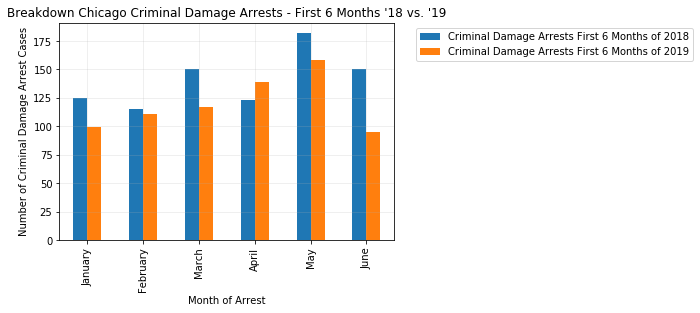

In [44]:
# Creating Monthly DataFrames for specific Crime for 2018 and 2019:
criminal_damage_jan_2018_df = jan_2018_df.loc[jan_2018_df["Primary Description"] == "CRIMINAL DAMAGE"]
criminal_damage_jan_2018 = len(criminal_damage_jan_2018_df)
criminal_damage_jan_2019_df = jan_2019_df.loc[jan_2019_df["Primary Description"] == "CRIMINAL DAMAGE"]
criminal_damage_jan_2019 = len(criminal_damage_jan_2019_df)

criminal_damage_feb_2018_df = feb_2018_df.loc[feb_2018_df["Primary Description"] == "CRIMINAL DAMAGE"]
criminal_damage_feb_2018 = len(criminal_damage_feb_2018_df)
criminal_damage_feb_2019_df = feb_2019_df.loc[feb_2019_df["Primary Description"] == "CRIMINAL DAMAGE"]
criminal_damage_feb_2019 = len(criminal_damage_feb_2019_df)

criminal_damage_mar_2018_df = mar_2018_df.loc[mar_2018_df["Primary Description"] == "CRIMINAL DAMAGE"]
criminal_damage_mar_2018 = len(criminal_damage_mar_2018_df)
criminal_damage_mar_2019_df = mar_2019_df.loc[mar_2019_df["Primary Description"] == "CRIMINAL DAMAGE"]
criminal_damage_mar_2019 = len(criminal_damage_mar_2019_df)

criminal_damage_apr_2018_df = apr_2018_df.loc[apr_2018_df["Primary Description"] == "CRIMINAL DAMAGE"]
criminal_damage_apr_2018 = len(criminal_damage_apr_2018_df)
criminal_damage_apr_2019_df = apr_2019_df.loc[apr_2019_df["Primary Description"] == "CRIMINAL DAMAGE"]
criminal_damage_apr_2019 = len(criminal_damage_apr_2019_df)

criminal_damage_may_2018_df = may_2018_df.loc[may_2018_df["Primary Description"] == "CRIMINAL DAMAGE"]
criminal_damage_may_2018 = len(criminal_damage_may_2018_df)
criminal_damage_may_2019_df = may_2019_df.loc[may_2019_df["Primary Description"] == "CRIMINAL DAMAGE"]
criminal_damage_may_2019 = len(criminal_damage_may_2019_df)

criminal_damage_jun_2018_df = jun_2018_df.loc[jun_2018_df["Primary Description"] == "CRIMINAL DAMAGE"]
criminal_damage_jun_2018 = len(criminal_damage_jun_2018_df)
criminal_damage_jun_2019_df = jun_2019_df.loc[jun_2019_df["Primary Description"] == "CRIMINAL DAMAGE"]
criminal_damage_jun_2019 = len(criminal_damage_jun_2019_df)


# Counting the number of criminal_damage arrests for January 2018 and 2019 as an example of what can be done graphically:
jan_criminal_damage_arrest_count_18 = criminal_damage_jan_2018_df['Arrest'].value_counts()
jan_criminal_damage_arrest_18_tuples = [tuple((x, y)) for x, y in jan_criminal_damage_arrest_count_18.items()]
jan_criminal_damage_arrests_18_df = pd.DataFrame(jan_criminal_damage_arrest_18_tuples)
jan_criminal_damage_arrests_18_df['2']=['N','Y']
jan_criminal_damage_arrests_18_df = jan_criminal_damage_arrests_18_df.rename(columns={0: "R"})
jan_criminal_damage_arrests_18_df = jan_criminal_damage_arrests_18_df.drop(columns="R")

jan_criminal_damage_arr_18_df = jan_criminal_damage_arrests_18_df.set_index(["2"])
jan_criminal_damage_arr_18_df = jan_criminal_damage_arr_18_df.transpose()
count_jan_criminal_damage_arrest_6mo_18 = round(jan_criminal_damage_arr_18_df["Y"].mean())

jan_criminal_damage_arrest_6mo_19_df = criminal_damage_jan_2019_df.loc[criminal_damage_jan_2019_df["Arrest"] == "Y"]
count_jan_criminal_damage_arrest_6mo_19 = len(jan_criminal_damage_arrest_6mo_19_df)
print(count_jan_criminal_damage_arrest_6mo_18, count_jan_criminal_damage_arrest_6mo_19)

# Counting the number of criminal_damage arrests for February 2018 and 2019:
feb_criminal_damage_arrest_count_18 = criminal_damage_feb_2018_df['Arrest'].value_counts()
feb_criminal_damage_arrest_18_tuples = [tuple((x, y)) for x, y in feb_criminal_damage_arrest_count_18.items()]
feb_criminal_damage_arrests_18_df = pd.DataFrame(feb_criminal_damage_arrest_18_tuples)
feb_criminal_damage_arrests_18_df['2']=['N','Y']
feb_criminal_damage_arrests_18_df = feb_criminal_damage_arrests_18_df.rename(columns={0: "R"})
feb_criminal_damage_arrests_18_df = feb_criminal_damage_arrests_18_df.drop(columns="R")

feb_criminal_damage_arr_18_df = feb_criminal_damage_arrests_18_df.set_index(["2"])
feb_criminal_damage_arr_18_df = feb_criminal_damage_arr_18_df.transpose()
count_feb_criminal_damage_arrest_6mo_18 = round(feb_criminal_damage_arr_18_df["Y"].mean())

feb_criminal_damage_arrest_6mo_19_df = criminal_damage_feb_2019_df.loc[criminal_damage_feb_2019_df["Arrest"] == "Y"]
count_feb_criminal_damage_arrest_6mo_19 = len(feb_criminal_damage_arrest_6mo_19_df)
print(count_feb_criminal_damage_arrest_6mo_18, count_feb_criminal_damage_arrest_6mo_19)

# Counting the number of criminal_damage arrests for March 2018 and 2019:
mar_criminal_damage_arrest_count_18 = criminal_damage_mar_2018_df['Arrest'].value_counts()
mar_criminal_damage_arrest_18_tuples = [tuple((x, y)) for x, y in mar_criminal_damage_arrest_count_18.items()]
mar_criminal_damage_arrests_18_df = pd.DataFrame(mar_criminal_damage_arrest_18_tuples)
mar_criminal_damage_arrests_18_df['2']=['N','Y']
mar_criminal_damage_arrests_18_df = mar_criminal_damage_arrests_18_df.rename(columns={0: "R"})
mar_criminal_damage_arrests_18_df = mar_criminal_damage_arrests_18_df.drop(columns="R")

mar_criminal_damage_arr_18_df = mar_criminal_damage_arrests_18_df.set_index(["2"])
mar_criminal_damage_arr_18_df = mar_criminal_damage_arr_18_df.transpose()
count_mar_criminal_damage_arrest_6mo_18 = round(mar_criminal_damage_arr_18_df["Y"].mean())

mar_criminal_damage_arrest_6mo_19_df = criminal_damage_mar_2019_df.loc[criminal_damage_mar_2019_df["Arrest"] == "Y"]
count_mar_criminal_damage_arrest_6mo_19 = len(mar_criminal_damage_arrest_6mo_19_df)
print(count_mar_criminal_damage_arrest_6mo_18, count_mar_criminal_damage_arrest_6mo_19)

# Counting the number of criminal_damage arrests for April 2018 and 2019:
apr_criminal_damage_arrest_count_18 = criminal_damage_apr_2018_df['Arrest'].value_counts()
apr_criminal_damage_arrest_18_tuples = [tuple((x, y)) for x, y in apr_criminal_damage_arrest_count_18.items()]
apr_criminal_damage_arrests_18_df = pd.DataFrame(apr_criminal_damage_arrest_18_tuples)
apr_criminal_damage_arrests_18_df['2']=['N','Y']
apr_criminal_damage_arrests_18_df = apr_criminal_damage_arrests_18_df.rename(columns={0: "R"})
apr_criminal_damage_arrests_18_df = apr_criminal_damage_arrests_18_df.drop(columns="R")

apr_criminal_damage_arr_18_df = apr_criminal_damage_arrests_18_df.set_index(["2"])
apr_criminal_damage_arr_18_df = apr_criminal_damage_arr_18_df.transpose()
count_apr_criminal_damage_arrest_6mo_18 = round(apr_criminal_damage_arr_18_df["Y"].mean())

apr_criminal_damage_arrest_6mo_19_df = criminal_damage_apr_2019_df.loc[criminal_damage_apr_2019_df["Arrest"] == "Y"]
count_apr_criminal_damage_arrest_6mo_19 = len(apr_criminal_damage_arrest_6mo_19_df)
print(count_apr_criminal_damage_arrest_6mo_18, count_apr_criminal_damage_arrest_6mo_19)

# Counting the number of criminal_damage arrests for May 2018 and 2019:
may_criminal_damage_arrest_count_18 = criminal_damage_may_2018_df['Arrest'].value_counts()
may_criminal_damage_arrest_18_tuples = [tuple((x, y)) for x, y in may_criminal_damage_arrest_count_18.items()]
may_criminal_damage_arrests_18_df = pd.DataFrame(may_criminal_damage_arrest_18_tuples)
may_criminal_damage_arrests_18_df['2']=['N','Y']
may_criminal_damage_arrests_18_df = may_criminal_damage_arrests_18_df.rename(columns={0: "R"})
may_criminal_damage_arrests_18_df = may_criminal_damage_arrests_18_df.drop(columns="R")

may_criminal_damage_arr_18_df = may_criminal_damage_arrests_18_df.set_index(["2"])
may_criminal_damage_arr_18_df = may_criminal_damage_arr_18_df.transpose()
count_may_criminal_damage_arrest_6mo_18 = round(may_criminal_damage_arr_18_df["Y"].mean())

may_criminal_damage_arrest_6mo_19_df = criminal_damage_may_2019_df.loc[criminal_damage_may_2019_df["Arrest"] == "Y"]
count_may_criminal_damage_arrest_6mo_19 = len(may_criminal_damage_arrest_6mo_19_df)
print(count_may_criminal_damage_arrest_6mo_18, count_may_criminal_damage_arrest_6mo_19)

# Counting the number of criminal_damage arrests for June 2018 and 2019:
jun_criminal_damage_arrest_count_18 = criminal_damage_jun_2018_df['Arrest'].value_counts()
jun_criminal_damage_arrest_18_tuples = [tuple((x, y)) for x, y in jun_criminal_damage_arrest_count_18.items()]
jun_criminal_damage_arrests_18_df = pd.DataFrame(jun_criminal_damage_arrest_18_tuples)
jun_criminal_damage_arrests_18_df['2']=['N','Y']
jun_criminal_damage_arrests_18_df = jun_criminal_damage_arrests_18_df.rename(columns={0: "R"})
jun_criminal_damage_arrests_18_df = jun_criminal_damage_arrests_18_df.drop(columns="R")

jun_criminal_damage_arr_18_df = jun_criminal_damage_arrests_18_df.set_index(["2"])
jun_criminal_damage_arr_18_df = jun_criminal_damage_arr_18_df.transpose()
count_jun_criminal_damage_arrest_6mo_18 = round(jun_criminal_damage_arr_18_df["Y"].mean())

jun_criminal_damage_arrest_6mo_19_df = criminal_damage_jun_2019_df.loc[criminal_damage_jun_2019_df["Arrest"] == "Y"]
count_jun_criminal_damage_arrest_6mo_19 = len(jun_criminal_damage_arrest_6mo_19_df)
print(count_jun_criminal_damage_arrest_6mo_18, count_jun_criminal_damage_arrest_6mo_19)


# Creating 6mo dicts for 2018 and 2019:
criminal_damage_arrests_6mo_2018_dict = {
    'January' : count_jan_criminal_damage_arrest_6mo_18,
    'February' : count_feb_criminal_damage_arrest_6mo_18,
    'March' : count_mar_criminal_damage_arrest_6mo_18,
    'April' : count_apr_criminal_damage_arrest_6mo_18,
    'May' : count_may_criminal_damage_arrest_6mo_18,
    'June' : count_jun_criminal_damage_arrest_6mo_18,
}

criminal_damage_arrests_6mo_2019_dict = {
    'January' : count_jan_criminal_damage_arrest_6mo_19,
    'February' : count_feb_criminal_damage_arrest_6mo_19,
    'March' : count_mar_criminal_damage_arrest_6mo_19,
    'April' : count_apr_criminal_damage_arrest_6mo_19,
    'May' : count_may_criminal_damage_arrest_6mo_19,
    'June' : count_jun_criminal_damage_arrest_6mo_19,
}

# Creating a single dataframe for graphing:
criminal_damage_arrests_by_month_6mo_2018_df = pd.DataFrame(criminal_damage_arrests_6mo_2018_dict, index=[0])
criminal_damage_arrests_by_month_6mo_2019_df = pd.DataFrame(criminal_damage_arrests_6mo_2019_dict, index=[0])
criminal_damage_abm6mo18_df = criminal_damage_arrests_by_month_6mo_2018_df.transpose()
criminal_damage_abm6mo_df = criminal_damage_abm6mo18_df.rename(columns={0: "Criminal Damage Arrests First 6 Months of 2018"})
criminal_damage_abm6mo_df["Criminal Damage Arrests First 6 Months of 2019"] = criminal_damage_arrests_by_month_6mo_2019_df.transpose()
criminal_damage_abm6mo_df

# AS AN EXAMPLE:
# Breakdown of criminal_damage arrests by month for first 6 months:

ax = criminal_damage_abm6mo_df.plot.bar(rot=90)
# Incorporate the other graph properties
plt.title("Breakdown Chicago Criminal Damage Arrests - First 6 Months '18 vs. '19")
plt.ylabel("Number of Criminal Damage Arrest Cases")
plt.xlabel("Month of Arrest")
plt.grid(alpha = 0.25)
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1))

# Save the figure
plt.savefig("Resources/Breakdown of Chicago Criminal Damage Arrests in First Six Months 2018 vs 2019.png")

# Show plot
plt.show()


In [45]:
arrests_cc_by_type_6mo_df = pd.DataFrame()
arrests_cc_by_type_6mo_df = theft_abm6mo_df.merge(battery_abm6mo_df, how='outer', left_index=True, right_index=True)
arrests_cc_by_type_6mo_df = arrests_cc_by_type_6mo_df.merge(criminal_damage_abm6mo_df, how='outer', left_index=True, right_index=True)
arrests_cc_by_type_6mo_df = arrests_cc_by_type_6mo_df.rename(columns={"Criminal Damage Arrests First 6 Months of 2018": "Criminal Damage 2018", "Criminal Damage Arrests First 6 Months of 2019": "Criminal Damage 2019", "Theft Arrests First 6 Months of 2018": "Theft 2018","Theft Arrests First 6 Months of 2019": "Theft 2019","Battery Arrests First 6 Months of 2018": "Battery 2018", "Battery Arrests First 6 Months of 2019": "Battery 2019"})
accbt6mo_df = arrests_cc_by_type_6mo_df.transpose()
accbt6mo_df

,January,February,March,April,May,June
Theft 2018,501,478,529,528,540,545
Theft 2019,509,470,449,462,529,282
Battery 2018,771,766,840,748,1036,896
Battery 2019,771,709,886,822,937,670
Criminal Damage 2018,125,115,150,123,182,150
Criminal Damage 2019,99,111,117,139,158,95


In [46]:
# Summing the total arrests for the three primary categories '18 & '19:

cd_a_6mo_tot_18 = arrests_cc_by_type_6mo_df["Criminal Damage 2018"].sum()
cd_a_6mo_tot_19 = arrests_cc_by_type_6mo_df["Criminal Damage 2019"].sum()

b_a_6mo_tot_18 = arrests_cc_by_type_6mo_df["Battery 2018"].sum()
b_a_6mo_tot_19 = arrests_cc_by_type_6mo_df["Battery 2019"].sum()

t_a_6mo_tot_18 = arrests_cc_by_type_6mo_df["Theft 2018"].sum()
t_a_6mo_tot_19 = arrests_cc_by_type_6mo_df["Theft 2019"].sum()

# Merging into a singl DataFrame for graphing:
greatest_crime_arrests_18_dict = {
    "Criminal Damage Arrests" : cd_a_6mo_tot_18,
    "Battery Arrests" : b_a_6mo_tot_18,
    "Theft Arrests" : t_a_6mo_tot_18
}
greatest_crime_arrests_19_dict = {
    "Criminal Damage Arrests" : cd_a_6mo_tot_19,
    "Battery Arrests" : b_a_6mo_tot_19,
    "Theft Arrests" : t_a_6mo_tot_19
}

cd_b_t_arrests_6mo_2018_df = pd.DataFrame(greatest_crime_arrests_18_dict, index=[0])
cd_b_t_arrests_6mo_2019_df = pd.DataFrame(greatest_crime_arrests_19_dict, index=[0])

cc_cd_b_t_arrests_6mo_2018_df = cd_b_t_arrests_6mo_2018_df.transpose()
ab6mo_df = cc_cd_b_t_arrests_6mo_2018_df.rename(columns={0: "2018 Six Month Totals"})
ab6mo_df["2019 Six Month Totals"] = cd_b_t_arrests_6mo_2019_df.transpose()
ab6mo_df

,2018 Six Month Totals,2019 Six Month Totals
Criminal Damage Arrests,845,719
Battery Arrests,5057,4795
Theft Arrests,3121,2701


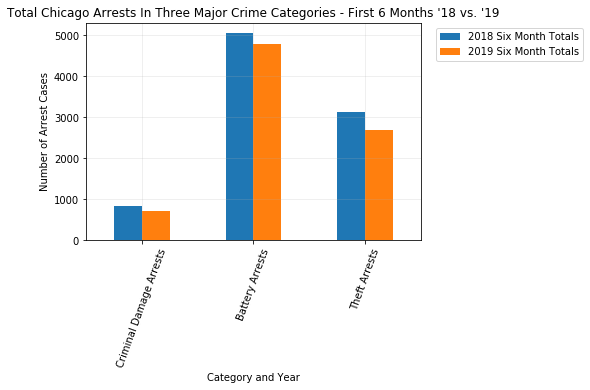

In [47]:
# Breakdown of arrests by 3 most common crime types for first 6 months:
# (Each crime type had at least 10,000 filed cases in 2018 & 2019)

ax = ab6mo_df.plot.bar(rot=90)
# Incorporate the other graph properties
plt.title("Total Chicago Arrests In Three Major Crime Categories - First 6 Months '18 vs. '19")
plt.ylabel("Number of Arrest Cases")
plt.xlabel("Category and Year")
plt.grid(alpha = 0.25)
plt.xticks(rotation=70)
plt.legend(bbox_to_anchor=(1.5, 1))

# Save the figure
plt.savefig("Resources/Total Chicago Arrests In Three Major Crime Categories First 6 Months 18 vs 19.png")

# Show plot
plt.show()

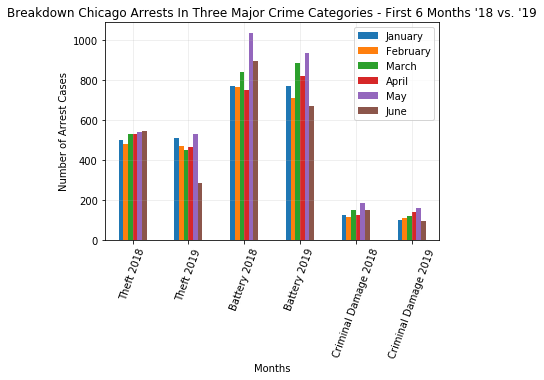

In [48]:
# Breakdown of arrests by 3 most common crime types for first 6 months:
# (Each crime type had at least 10,000 filed cases in 2018 & 2019)

ax = accbt6mo_df.plot.bar(rot=90)
# Incorporate the other graph properties
plt.title("Breakdown Chicago Arrests In Three Major Crime Categories - First 6 Months '18 vs. '19")
plt.ylabel("Number of Arrest Cases")
plt.xlabel("Months")
plt.grid(alpha = 0.25)
plt.xticks(rotation=70)

# Save the figure
plt.savefig("Resources/Breakdown Chicago Arrests In Three Major Crime Categories First 6 Months 18 vs 19.png")

# Show plot
plt.show()

It is interesting to note that between theft, battery, and criminal damage crimes, that although theft crimes were the most common crimes commited in this time frame, battery crimes have the highest arrest rates.